In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
model = keras.Sequential([
    layers.Dense(2, activation="relu", name="layer1"),
    layers.Dense(3, activation="relu", name="layer2"),
    layers.Dense(4, name="layer3"),
])
x = tf.ones((3, 3))
y = model(x)

In [4]:
layer1 = layers.Dense(2, activation="relu", name="layer1")
layer2 = layers.Dense(3, activation="relu", name="layer2")
layer3 = layers.Dense(4, name="layer3")
x = tf.ones((3, 3))
y = layer3(layer2(layer1(x)))

In [6]:
model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dense(3, activation="relu"),
    layers.Dense(4),
])
model.layers

In [7]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu"))
model.add(layers.Dense(3, activation="relu"))
model.add(layers.Dense(4))

In [8]:
model.pop()
print(len(model.layers))

2


In [13]:
model = keras.Sequential(name="my_sequential")
model.add(layers.Dense(2, activation="relu", name="layer1"))
model.add(layers.Dense(3, activation="relu", name="layer2"))
model.add(layers.Dense(4, name="layer3"))

In [16]:
layer = layers.Dense(3)
x = tf.ones((1, 4))
y = layer(x)
layer.weights

[<tf.Variable 'dense_6/kernel:0' shape=(4, 3) dtype=float32, numpy=
 array([[ 0.3539014 , -0.6499318 , -0.51072717],
        [ 0.8198241 , -0.18924189,  0.16388035],
        [-0.15228397,  0.44613588,  0.14234054],
        [-0.34849173, -0.4893662 , -0.55039   ]], dtype=float32)>,
 <tf.Variable 'dense_6/bias:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>]

In [17]:
model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dense(3, activation="relu"),
    layers.Dense(4),
])
x = tf.ones((1, 4))
y = model(x)
print("Number of weights after calling the model:", len(model.weights))

Number of weights after calling the model: 6


In [18]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (1, 2)                    10        
_________________________________________________________________
dense_8 (Dense)              (1, 3)                    9         
_________________________________________________________________
dense_9 (Dense)              (1, 4)                    16        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [19]:
model = keras.Sequential()
model.add(keras.Input(shape=(4, )))
model.add(layers.Dense(2, activation="relu"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.layers

In [22]:
model = keras.Sequential()
model.add(layers.Dense(2, activation="relu", input_shape=(4,)))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 2)                 10        
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [23]:
model = keras.Sequential()
model.add(keras.Input(shape=(250, 250, 3)))
model.add(layers.Conv2D(32, 5, strides=2, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.summary()

model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(3))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.Conv2D(32, 3, activation="relu"))
model.add(layers.MaxPooling2D(2))
model.summary()

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(10))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
Total params: 11,680
Trainable params: 11,680
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 123, 123, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 121, 121, 32)      9248      
____________________________

In [27]:
initial_model = keras.Sequential([
    keras.Input(shape=(250, 250, 3)),
    layers.Conv2D(32, 5, strides=2, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Conv2D(32, 3, activation="relu"),
])
feature_extractor = keras.Model(inputs=initial_model.inputs, outputs=[layer.output for layer in initial_model.layers])
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

In [29]:
initial_model = keras.Sequential([
    keras.Input(shape=(250, 250, 3)),
    layers.Conv2D(32, 5, strides=2, activation="relu"),
    layers.Conv2D(32, 3, activation="relu", name="my_intermediate_layer"),
    layers.Conv2D(32, 3, activation="relu")
])
feature_extractor = keras.Model(inputs=initial_model.inputs,
                                outputs=initial_model.get_layer(name="my_intermediate_layer").output)
x = tf.ones((1, 250, 250, 3))
features = feature_extractor(x)

In [31]:
model = keras.Sequential([
    keras.Input(shape=(784)),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(10),
])
model.load_weights(...)
for layer in model.layers[:-1]:
    layer.trainable=False

model.compile(...)
model.fit(...)

AttributeError: 'ellipsis' object has no attribute 'endswith'

In [33]:
base_model = keras.applications.Xception(
    weights = "imagenet",
    include_top=False,
    pooling="avg"
)
base_model.trainable = False
model = keras.Sequential([
    base_model,
    layers.Dense(1000),
])
model.compile(...)
model.fit(...)

83697664/83683744 [==============================] - 604s 7us/step


ValueError: Could not interpret optimizer identifier: Ellipsis

# The Functional API

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))
dense = layers.Dense(64, activation="relu")
x = dense(inputs)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


Epoch 1/2
750/750 [==============================] - 4s 4ms/step - loss: 0.3385 - accuracy: 0.9028 - val_loss: 0.1845 - val_accuracy: 0.9461
Epoch 2/2
750/750 [==============================] - 3s 3ms/step - loss: 0.1595 - accuracy: 0.9528 - val_loss: 0.1395 - val_accuracy: 0.9597
313/313 - 0s - loss: 0.1333 - accuracy: 0.9603
Test loss: 0.13330422341823578
Test accuracy: 0.9603000283241272


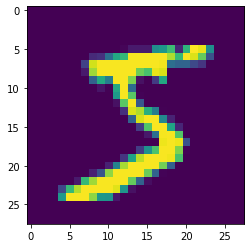

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer=keras.optimizers.RMSprop(), metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

In [49]:
y_train[0]

5

In [50]:
model.save("path_to_my_model")
del model
model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model\assets


In [56]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decode_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)
autoencoder = keras.Model(encoder_input, decode_output, name="wutoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_6 (Glob (None, 16)                0   

In [60]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()
decoder_input = keras.Input(shape=(16,), name="encoded_img")
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)
decoder = keras.Model(decoder_input, decoder_output, name="decoder")
decoder.summary()
autoencoder_input = keras.Input(shape=(28, 28, 1), name="img")
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name="autoencoder")
autoencoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_10 (Glo (None, 16)                0   

In [62]:
def get_model():
    inputs = keras.Input(shape=(128, ))
    outputs = layers.Dense(1)(inputs)
    return keras.Model(inputs, outputs)

model1 = get_model()
model2 = get_model()
model3 = get_model()
inputs = keras.Input(shape=(128,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
outputs = layers.average([y1, y2, y3])
ensemble_model = keras.Model(inputs=inputs, outputs = outputs)

In [66]:
num_tags = 12
num_words = 10000
num_departments = 4
title_input = keras.Input(shape=(None, ), name="title")
body_input = keras.Input(shape=(None, ), name="body")
tags_input = keras.Input(shape=(num_tags, ), name="tags")
title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)
title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)
x = layers.concatenate([title_features, body_features, tags_input])
priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name="department")(x)
model = keras.Model(inputs=[title_input, body_input, tags_input], 
                   outputs = [priority_pred, department_pred])

In [68]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss=[keras.losses.BinaryCrossentropy(from_logits=True), 
                  keras.losses.CategoricalCrossentropy(from_logits=True)],
             loss_weights=[1.0, 0.2])

In [69]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss={
    "priority": keras.losses.BinaryCrossentropy(from_logits=True),
    "department":keras.losses.CategoricalCrossentropy(from_logits=True),
},
loss_weights={"priority":1.0, "department":0.2})

In [71]:
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))
model.fit({"title":title_data, "body":body_data, "tags":tags_data}, 
         {"priority":priority_targets, "department":dept_targets},
         epochs=2, batch_size=32)

Epoch 1/2
40/40 [==============================] - 8s 54ms/step - loss: 1.2955 - priority_loss: 0.6983 - department_loss: 2.9857
Epoch 2/2
40/40 [==============================] - 2s 54ms/step - loss: 1.2859 - priority_loss: 0.6962 - department_loss: 2.9485


In [75]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)
model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_86 (Conv2D)              (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_87 (Conv2D)              (None, 28, 28, 64)   18496       conv2d_86[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_16 (MaxPooling2D) (None, 9, 9, 64)     0           conv2d_87[0][0]                  
_________________________________________________________________________________________

In [79]:
(x_train, y_train), (x_test, y_test) =keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss=keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["acc"])
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host

In [80]:
shared_embedding = layers.Embedding(1000, 128)
text_input_a = keras.Input(shape=(None, ), dtype="int32")
text_input_b = keras.Input(shape=(None, ), dtype="int32")
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

In [82]:
vgg19 = tf.keras.applications.VGG19()

574726144/574710816 [==============================] - 672s 1us/step


In [83]:
features_list = [layer.output for layer in vgg19.layers]

In [86]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)
img = np.random.random((1, 224, 224, 3)).astype("float32")
extracted_features = feat_extraction_model(img)

In [4]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer="random_normal", trainable=True)
    
    def call(self, inputs):
        return tf.matmul(inputs, self.w)
    
inputs = keras.Input((4, ))
outputs = CustomDense(10)(inputs)
model = keras.Model(inputs, outputs)

In [7]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units
    
    def build(self, input_shape):
        self.w = self.add_weight(shape = (input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer="random_normal", trainable=True)
        
    def call(self, inputs):
        return tf.matmul(inputs, self.w)
    
    def get_config(self):
        return {"units": self.units}
    
inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)
model = keras.Model(inputs, outputs)
config = model.get_config()
new_model = keras.Model.from_config(config, custom_objects={"CustomDense":CustomDense})

In [3]:
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)

In [6]:
class MLP(keras.Model):
    def __init__(self, **kwargs):
        super(MLP, self).__init__(**kwargs)
        self.dense_1 = layers.Dense(64, activation="relu")
        self.dense_2 = layers.Dense(10)
    def call(self, inputs):
        x = self.dense_1(inputs)
        return self.dense_2(x)
mlp = MLP()
_ = mlp(tf.zeros((1, 32)))

In [17]:
units = 32
timesteps = 10
input_dim = 5
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = model
    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)
rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)


In [16]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16
class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)
    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis = 1)
        return self.classifier(features)
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)
model = keras.Model(inputs, outputs)
rnn_mdel = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))

(1, 10, 32)


# Training and evaluation with the built-in models

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784, ), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
x_test = x_test.reshape(10000, 784).astype("float32")/255
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [4]:
model.compile(optimizer=keras.optimizers.RMSprop(), 
             loss = keras.losses.SparseCategoricalCrossentropy(),
             metrics=[keras.metrics.SparseCategoricalAccuracy()])


In [5]:
print("Fit model on training data")
history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_data=(x_val, y_val))

Fit model on training data
Epoch 1/2
782/782 [==============================] - 2s 2ms/step - loss: 0.3387 - sparse_categorical_accuracy: 0.9045 - val_loss: 0.2081 - val_sparse_categorical_accuracy: 0.9371
Epoch 2/2
782/782 [==============================] - 1s 2ms/step - loss: 0.1599 - sparse_categorical_accuracy: 0.9525 - val_loss: 0.1459 - val_sparse_categorical_accuracy: 0.9589


In [6]:
history.history

{'loss': [0.33871322870254517, 0.15987689793109894],
 'sparse_categorical_accuracy': [0.9045000076293945, 0.9525200128555298],
 'val_loss': [0.20805248618125916, 0.1458704173564911],
 'val_sparse_categorical_accuracy': [0.9370999932289124, 0.958899974822998]}

In [7]:
print("Evaluate on the test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)
print("Generate predictions for 3 samples")
predictions = model.predict(x_test[:3])
print("predictions shape", predictions.shape)

Evaluate on the test data
79/79 [==============================] - 0s 1ms/step - loss: 0.1502 - sparse_categorical_accuracy: 0.9540
test loss, test acc: [0.15023291110992432, 0.9539999961853027]
Generate predictions for 3 samples
predictions shape (3, 10)


In [8]:
def get_uncompiled_model():
    inputs = keras.Input(shape=(784, ), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"])
    return model

In [9]:
def custom_mean_squared_error(y_true, y_pred):
    return tf.math.reduce_mean(tf.square(y_true-y_pred))
model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=custom_mean_squared_error)
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64)

782/782 [==============================] - 1s 1ms/step - loss: 0.0160


In [10]:
class CustomMSE(keras.losses.Loss):
    def __init__(self, regularization_factor=0.1, name="custom_mse"):
        super().__init__(name=name)
        self.regularization_factor = regularization_factor
    
    def call(self, y_true, y_pred):
        mse = tf.math.reduce_mean(tf.square(y_true - y_pred))
        reg = tf.math.reduce_mean(tf.square(0.5 - y_pred))
        return mse + reg * self.regularization_factor
model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.Adam(), loss=CustomMSE())
y_train_one_hot = tf.one_hot(y_train, depth=10)
model.fit(x_train, y_train_one_hot, batch_size=64, epochs=1)

782/782 [==============================] - 1s 1ms/step - loss: 0.0391


In [11]:
class CategoricalTruePositives(keras.metrics.Metric):F
    def __init__(self, name="categorical_true_positives", **kwargs):
        super(CategoricalTruePositives, self).__init__(name=name, **kwargs)
        self.true_positives = self.add_weight(name="ctp", initializer="zeros")
    
    def update_state(self, y_true, y_pred, sample_weight = None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, "int32") == tf.cast(y_pred, "int32")
        values = tf.cast(values, "float32")
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, "float32")
            values = tf.multiply(values, sample_weight)
        self.true_positives.assign_add(tf.reduce_sum(values))
    
    def result(self):
        return self.true_positives
    
    def reset_state(self):
        self.true_positives.assign(0.0)

model = get_uncompiled_model()
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3),
             loss=keras.losses.SparseCategoricalCrossentropy(),
             metrics = [CategoricalTruePositives()])
model.fit(x_train, y_train, batch_size=64, epochs=3)

Epoch 1/3
782/782 [==============================] - 1s 1ms/step - loss: 0.3432 - categorical_true_positives: 45275.0000
Epoch 2/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1645 - categorical_true_positives: 47543.0000
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1204 - categorical_true_positives: 48194.0000


In [12]:
class ActivityRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(tf.reduce_sum(inputs) * 0.1)
        return inputs
inputs = keras.Input(shape=(784, ), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = ActivityRegularizationLayer()(x)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, batch_size=64, epochs=1)

782/782 [==============================] - 2s 2ms/step - loss: 2.5038


In [13]:
class MetricLoggingLayer(layers.Layer):
    def call(self, inputs):
        self.add_metric(keras.backend.std(inputs), name="std_of_activation", aggregation="mean")
        return inputs

inputs = keras.Input(shape=(784,), name="digits")
x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = MetricLoggingLayer()(x)
x = layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = layers.Dense(10, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-3), 
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, batch_size=64, epochs=1)

782/782 [==============================] - 1s 1ms/step - loss: 0.3399 - std_of_activation: 1.0385


In [14]:
inputs = keras.Input(shape=(784,), name="digits")
x1 = layers.Dense(64, activation="relu", name="dense_1")(inputs)
x2 = layers.Dense(64, activation="relu", name="dense_2")(x1)
outputs = layers.Dense(10, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)
model.add_loss(tf.reduce_sum(x1) * 0.1)
model.add_metric(keras.backend.std(x1), name="std_of_activation", aggregation="mean")
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), 
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True))
model.fit(x_train, y_train, batch_size=64, epochs=1)

782/782 [==============================] - 1s 1ms/step - loss: 2.5221 - std_of_activation: 0.0020A: 0s - loss: 2.8306 - std_of_activatio - ETA: 0s - loss: 2.5573 - std_of_activation: 0.0


In [15]:
class LogisticEndpoint(keras.layers.Layer):
    def __init__(self, name=None):
        super(LogisticEndpoint, self).__init__(name=name)
        self.loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
        self.accuracy_fn = keras.metrics.BinaryAccuracy()
    def call(self, targets, logits, sample_weights=None):
        loss = self.loss_fn(targets, logits, sample_weights)
        self.add_loss(loss)
        acc = self.accuracy_fn(targets, logits, sample_weights)
        self.add_metric(acc, name="accuracy")
        return tf.nn.softmax(logits)

In [16]:
import numpy as np
inputs = keras.Input(shape=(3, ), name="inputs")
targets = keras.Input(shape=(10,), name="targets")
logits = keras.layers.Dense(10)(inputs)
predictions = LogisticEndpoint(name="predictions")(logits, targets)
model = keras.Model(inputs=[inputs, targets], outputs=predictions)
model.compile(optimizer="adam")
data = {
    "inputs":np.random.random((3, 3)),
    "targets":np.random.random((3, 10))
}
model.fit(data)

1/1 [==============================] - 0s 198ms/step - loss: 0.9688 - binary_accuracy: 0.0000e+00


In [17]:
model = get_compiled_model()
model.fit(x_train, y_train, batch_size=64, validation_split=0.2, epochs=1)

625/625 [==============================] - 2s 2ms/step - loss: 0.3865 - sparse_categorical_accuracy: 0.8898 - val_loss: 0.2458 - val_sparse_categorical_accuracy: 0.9265


In [18]:
model = get_compiled_model()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(64)
model.fit(train_dataset, epochs=3)
print("Evaluate")
result = model.evaluate(test_dataset)
dict(zip(model.metrics_names, result))

Epoch 1/3
782/782 [==============================] - 2s 2ms/step - loss: 0.3465 - sparse_categorical_accuracy: 0.9022
Epoch 2/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1616 - sparse_categorical_accuracy: 0.9521
Epoch 3/3
782/782 [==============================] - 1s 2ms/step - loss: 0.1175 - sparse_categorical_accuracy: 0.9653
Evaluate
157/157 [==============================] - 0s 1ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9620


{'loss': 0.12337513267993927,
 'sparse_categorical_accuracy': 0.9620000123977661}

In [19]:
model = get_compiled_model()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 1s 2ms/step - loss: 0.8183 - sparse_categorical_accuracy: 0.7883
Epoch 2/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3633 - sparse_categorical_accuracy: 0.8977
Epoch 3/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3212 - sparse_categorical_accuracy: 0.9045


In [20]:
model = get_compiled_model()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)
model.fit(train_dataset, epochs=1, validation_data=val_dataset)

782/782 [==============================] - 2s 2ms/step - loss: 0.3426 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.2059 - val_sparse_categorical_accuracy: 0.9399


In [21]:
model = get_compiled_model()
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(64)
model.fit(train_dataset, epochs=1, validation_data=val_dataset, validation_steps=10)

782/782 [==============================] - 2s 2ms/step - loss: 0.3312 - sparse_categorical_accuracy: 0.9059 - val_loss: 0.2660 - val_sparse_categorical_accuracy: 0.9406


In [30]:
from skimage.io import imread
from skimage.transform import resize
import numpy as np
class CIFAR10Sequence(Sequence):
    def __init__(self, filenames, labels, batch_size):
        self.filenames, self.labels = filenames, labels
        self.batch_size = batch_size
    def __len__(self):
        return int(np.ceil(len(self.filenames) / float(self.batch_size)))
    def __getitem__(self, idx):
        batch_x = self.filenames[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.labels[idx * self.batch_size:(idx + 1) * self.batch_size]
        return np.array([resize(imread(filename), (200, 200)) for filename in batch_x]), np.array(batch_y)
sequence = CIFAR10Sequence(filenames, labels, batch_size)
model.fit(sequence, epochs=10)

NameError: name 'Sequence' is not defined

In [22]:
import numpy as np
class_weight = {
    0:1.0,
    1:1.0,
    2:1.0,
    3:1.0,
    4:1.0,
    5:2.0,
    6:1.0,
    7:1.0,
    8:1.0,
    9:1.0,
}
print("Fit with class weight")
model = get_compiled_model()
model.fit(x_train, y_train, class_weight=class_weight, batch_size=64, epochs=1)

Fit with class weight
782/782 [==============================] - 2s 1ms/step - loss: 0.3741 - sparse_categorical_accuracy: 0.9009


In [23]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0
print("Fit with sample weight")
model = get_compiled_model()
model.fit(x_train, y_train, sample_weight=sample_weight, batch_size=64, epochs=1)

Fit with sample weight
782/782 [==============================] - ETA: 0s - loss: 0.3636 - sparse_categorical_accuracy: 0.903 - 1s 1ms/step - loss: 0.3597 - sparse_categorical_accuracy: 0.9041


In [24]:
sample_weight = np.ones(shape=(len(y_train),))
sample_weight[y_train == 5] = 2.0
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train, sample_weight))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
model = get_compiled_model()
model.fit(train_dataset, epochs=1)

782/782 [==============================] - 2s 2ms/step - loss: 0.3604 - sparse_categorical_accuracy: 0.9053


In [25]:
image_input = keras.Input(shape=(32, 32, 3), name="img_input")
timeseries_input = keras.Input(shape=(None, 10), name="ts_input")
x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)
x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)
x = layers.concatenate([x1, x2])
score_output = layers.Dense(1, name="score_output")(x)
class_output = layers.Dense(5, name="class_output")(x)
model = keras.Model(inputs=[image_input, timeseries_input], outputs=[score_output, class_output])

In [26]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3), loss=[keras.losses.MeanSquaredError(),
                                                              keras.losses.CategoricalCrossentropy()])

In [27]:
model.compile(keras.optimizers.RMSprop(1e-3),
        loss = [keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()],
        metrics=[
            [
                keras.metrics.MeanAbsolutePercentageError(),
                keras.metrics.MeanAbsoluteError(),
            ],
            [keras.metrics.CategoricalAccuracy()]
        ]
             )

In [28]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={
                 "score_output":keras.losses.MeanSquaredError(),
                 "class_output":keras.losses.CategoricalCrossentropy()
             },
             metrics={
                 "score_output":[keras.metrics.MeanAbsolutePercentageError(),
                                keras.metrics.MeanAbsoluteError()],
                 "class_output":[keras.metrics.CategoricalAccuracy()]
             })

In [29]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={
                 "score_output":keras.losses.MeanSquaredError(),
                 "class_output":keras.losses.CategoricalCrossentropy()
             },
             metrics={
                 "score_output":[
                     keras.metrics.MeanAbsolutePercentageError(),
                     keras.metrics.MeanAbsoluteError()
                 ],
                 "class_output":[keras.metrics.CategoricalAccuracy()]
             },
             loss_weights={"score_output":2.0, "class_output":1.0})

In [30]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss=[None, keras.losses.CategoricalCrossentropy()])
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss={"class_output":keras.losses.CategoricalCrossentropy()})

In [31]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
             loss=[keras.losses.MeanSquaredError(), keras.losses.CategoricalCrossentropy()])
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))
model.fit([img_data, ts_data], [score_targets, class_targets], batch_size=32, epochs=1)
model.fit({
    "img_input":img_data, "ts_input":ts_data
},{
    "score_output":score_targets, "class_output":class_targets
})

4/4 [==============================] - 0s 13ms/step - loss: 18.1968 - score_output_loss: 0.6225 - class_output_loss: 17.5743


In [32]:
train_dataset = tf.data.Dataset.from_tensor_slices(({"img_input":img_data, "ts_input":ts_data},
                                                  {"score_output":score_targets, "class_output":class_targets}))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
model.fit(train_dataset, epochs=1)

2/2 [==============================] - 0s 16ms/step - loss: 17.4951 - score_output_loss: 0.6671 - class_output_loss: 16.8280


In [33]:
model = get_compiled_model()
callbacks = [
    keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=1e-2,
    patience=2,
    verbose=1)
]
model.fit(x_train, y_train, epochs=20, batch_size=64, callbacks=callbacks, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 1s 2ms/step - loss: 0.3624 - sparse_categorical_accuracy: 0.8976 - val_loss: 0.2188 - val_sparse_categorical_accuracy: 0.9356
Epoch 2/20
625/625 [==============================] - 1s 2ms/step - loss: 0.1680 - sparse_categorical_accuracy: 0.9500 - val_loss: 0.1779 - val_sparse_categorical_accuracy: 0.9467
Epoch 3/20
625/625 [==============================] - 1s 1ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9620 - val_loss: 0.1537 - val_sparse_categorical_accuracy: 0.9518
Epoch 4/20
625/625 [==============================] - 1s 2ms/step - loss: 0.0982 - sparse_categorical_accuracy: 0.9707 - val_loss: 0.1463 - val_sparse_categorical_accuracy: 0.9556
Epoch 5/20
625/625 [==============================] - 1s 2ms/step - loss: 0.0802 - sparse_categorical_accuracy: 0.9765 - val_loss: 0.1375 - val_sparse_categorical_accuracy: 0.9596
Epoch 6/20
625/625 [==============================] - 1s 1ms/step - loss: 0.0679 - sparse_categorica

In [34]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []
    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

In [36]:
model = get_compiled_model()
callbacks = [
    keras.callbacks.ModelCheckpoint(
    filepath="mymodel_{epoch}",
    save_best_only=True,
    moniter="val_loss", 
    verbose=1)
]
model.fit(x_train, y_train, epochs=2, batch_size=64, callbacks=callbacks, validation_split=0.2)

Epoch 1/2
625/625 [==============================] - 1s 2ms/step - loss: 0.3620 - sparse_categorical_accuracy: 0.8958 - val_loss: 0.2210 - val_sparse_categorical_accuracy: 0.9327

Epoch 00001: val_loss improved from inf to 0.22102, saving model to mymodel_1
INFO:tensorflow:Assets written to: mymodel_1\assets
Epoch 2/2
625/625 [==============================] - 1s 1ms/step - loss: 0.1648 - sparse_categorical_accuracy: 0.9507 - val_loss: 0.1703 - val_sparse_categorical_accuracy: 0.9504

Epoch 00002: val_loss improved from 0.22102 to 0.17034, saving model to mymodel_2
INFO:tensorflow:Assets written to: mymodel_2\assets


In [38]:
import os
checkpoint_dir = "./ckpt"
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
def make_or_restore_model():
    checkpoints = [checkpoint_dir + "/" + name for name in os.listdir(checkpoint_dir)]
    if checkpoints:
        latest_checkpoint = max(checkpoints, key=os.path.getctime)
        print("Restoring from", latest_checkpoint)
        return keras.models.load_model(latest_checkpoint)
    print("Creating a new model")
    return get_compiled_model()
model = make_or_restore_model()
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath=checkpoint_dir + "/ckpt-loss={loss:.2f}", save_freq=100)
]
mode.fit(x_train, y_train, epochs=1, callbacks=callbacks)

Restoring from ./ckpt/checkpoint


OSError: SavedModel file does not exist at: ./ckpt/checkpoint\{saved_model.pbtxt|saved_model.pb}

In [41]:
initial_learning_rate = 0.1
lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate, decay_steps=100000, decay_rate=0.96, 
                                                          staircase=True)
optimizer = keras.optimizers.RMSprop(learning_rate=lr_schedule)

# Making new Layers and Models via subclassing

In [42]:
import tensorflow as tf
from tensorflow import keras

In [48]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(initial_value=w_init(shape=(input_dim, units), dtype="float32"), trainable=True)
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(initial_value=b_init(shape=(units, ), dtype="float32"), trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [49]:
x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[ 0.0130002   0.02132882 -0.07102855 -0.08569014]
 [ 0.0130002   0.02132882 -0.07102855 -0.08569014]], shape=(2, 4), dtype=float32)


In [50]:
assert linear_layer.weights == [linear_layer.w, linear_layer.b]

In [53]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units, ), initializer="zeros", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

x = tf.ones((2, 2))
linear_layer = Linear(4, 2)
y = linear_layer(x)
print(y)

tf.Tensor(
[[-0.0934522   0.03243705  0.04224774 -0.04856107]
 [-0.0934522   0.03243705  0.04224774 -0.04856107]], shape=(2, 4), dtype=float32)


In [55]:
class ComputeSum(keras.layers.Layer):
    def __init__(self, input_dim):
        super(ComputeSum, self).__init__()
        self.total = tf.Variable(initial_value=tf.zeros((input_dim, )), trainable=False)
    def call(self, inputs):
        self.total.assign_add(tf.reduce_sum(inputs, axis=0))
        return self.total
x = tf.ones((2, 2))
my_sum = ComputeSum(2)
y = my_sum(x)
print(y.numpy())
y = my_sum(x)
print(y.numpy())

[2. 2.]
[4. 4.]


In [56]:
print("Weights:", len(my_sum.weights))
print("non-trainable weights:", len(my_sum.non_trainable_weights))
print("trainable_weights:", my_sum.trainable_weights)

Weights: 1
non-trainable weights: 1
trainable_weights: []


In [57]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, input_dim=32):
        super(Linear, self).__init__()
        self.w = self.add_weight(shape=(input_dim, units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(units, ), initializer="zeros", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [60]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

In [61]:
linear_layer = Linear(32)
y = linear_layer(x)

In [64]:
class MLPBlock(keras.layers.Layer):
    def __init__(self):
        super(MLPBlock, self).__init__()
        self.linear_1 = Linear(32)
        self.linear_2 = Linear(32)
        self.linear_3 = Linear(1)
    def call(self, inputs):
        x = self.linear_1(inputs)
        x = tf.nn.relu(x)
        x = self.linear_2(x)
        x = tf.nn.relu(x)
        return self.linear_3(x)
mlp = MLPBlock()
y = mlp(tf.ones(shape=(3, 64)))
print("weights:", len(mlp.weights))
print("trainable weights:", len(mlp.trainable_weights))

weights: 6
trainable weights: 6


In [66]:
class ActivityRegularizationLayer(keras.layers.Layer):
    def __init__(self, rate=1e-2):
        super(ActivityRegularizationLayer, self).__init__()
        self.rate = rate
    def call(self, inputs):
        self.add_loss(self.rate * tf.reduce_sum(inputs))
        return inputs

In [67]:
class OuterLayer(keras.layers.Layer):
    def __init__(self):
        super(OuterLayer, self).__init__()
        self.activity_reg = ActivityRegularizationLayer(1e-2)
    def call(self, inputs):
        return self.activity_reg(inputs)
layer = OuterLayer()
assert len(layer.losses) == 0
_ = layer(tf.zeros(1, 1))
assert len(layer.losses) == 1
_ = layer(tf.zeros(1, 1))
assert len(layer.losses) == 1

In [69]:
class OuterLayerWithKernelRegularizer(keras.layers.Layer):
    def __init__(self):
        super(OuterLayerWithKernelRegularizer, self).__init__()
        self.dense = keras.layers.Dense(32, kernel_regularizer=tf.keras.regularizers.l2(1e-3))
    def call(self, inputs):
        return self.dense(inputs)
layer = OuterLayerWithKernelRegularizer()
_ = layer(tf.zeros((1, 1)))
print(layer.losses)

[<tf.Tensor: shape=(), dtype=float32, numpy=0.001759471>]


In [72]:
import numpy as np
inputs = keras.Input(shape=(3,))
outputs = ActivityRegularizationLayer()(inputs)
model = keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))
model.compile(optimizer="adam")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))

1/1 [==============================] - 0s 99ms/step - loss: 0.0320


In [73]:
class LogisticEndpoint(keras.layers.Layer):
    def __init__(self, name=None):
        super(LogisticEndpoint, self).__init__(name=name)
        self.loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
        self.accuracy_fn = keras.metrics.BinaryAccuracy()
    def call(self, targets, logits, sample_weights=None):
        loss = self.loss_fn(targets, logits, sample_weights)
        self.add_loss(loss)
        acc = self.accuracy_fn(targets, logits, sample_weights)
        self.add_metric(acc, name="accuracy")
        return tf.nn.softmax(logits)

In [74]:
layer = LogisticEndpoint()
targets = tf.ones((2, 2))
logits = tf.ones((2, 2))
y = layer(targets, logits)
print("layer.metrics:", layer.metrics)
print("current accuracy value:", float(layer.metrics[0].result()))

layer.metrics: [<keras.metrics.BinaryAccuracy object at 0x000001C48DEEF0A0>]
current accuracy value: 1.0


In [83]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32):
        super(Linear, self).__init__()
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer="random_normal", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    def get_config(self):
        return {"units":self.units}
layer = Linear(64)
config = layer.get_config()
print(config)
new_layer = Linear.from_config(config)

{'units': 64}


In [84]:
class Linear(keras.layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(Linear, self).__init__(**kwargs)
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer="random_normal", train_able=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    def get_config(self):
        config = super(Linear, self).get_config()
        config.update({"units":self.units})
        return config
layer = Linear(64)
config = layer.get_config()
print(config)
new_layer = Linear.from_config(config)

{'name': 'linear_25', 'trainable': True, 'dtype': 'float32', 'units': 64}


In [85]:
class CustomDropout(keras.layers.Layer):
    def __init__(self, rate, **kwargs):
        super(CustomDropout, self).__init__(**kwargs)
        self.rate = rate
    def call(self, inputs, training=None):
        if training:
            return tf.nn.dropout(inputs, rate=self.rate)
        return inputs

In [86]:
class ResNet(tf.keras.Model):
    def __init__(self, num_classes=1000):
        super(ResNet, self).__init__()
        self.block_1 = ResNetBlock()
        self.block_2 = ResNetBlock()
        self.global_pool = layers.GlobalAveragePooling2D()
        self.classifier = Dense(num_classes)
    def call(self, inputs):
        x = self.block_1(inputs)
        x = self.block_2(x)
        x = self.global_pool(x)
        return self.classifier(x)
resnet = ResNet()
dataset = ...
resnet.fit(dataset, epochs=10)
resnet.save(filepath)

NameError: name 'ResNetBlock' is not defined

In [95]:
from tensorflow.keras import layers
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class Encoder(layers.Layer):
    def __init__(self, latent_dim=32, intermediate_dim=64, name="encoder", **kwargs):
        super(Encoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_mean = layers.Dense(latent_dim)
        self.dense_log_var = layers.Dense(latent_dim)
        self.sampling = Sampling()
    def call(self, inputs):
        x = self.dense_proj(inputs)
        z_mean = self.dense_mean(x)
        z_log_var = self.dense_log_var(x)
        z = self.sampling((z_mean, z_log_var))
        return z_mean, z_log_var, z

class Decoder(layers.Layer):
    def __init__(self, original_dim, intermediate_dim=64, name="decoder", **kwargs):
        super(Decoder, self).__init__(name=name, **kwargs)
        self.dense_proj = layers.Dense(intermediate_dim, activation="relu")
        self.dense_output = layers.Dense(original_dim, activation="sigmoid")
    def call(self, inputs):
        x = self.dense_proj(inputs)
        return self.dense_output(x)
class VariationalAutoEncoder(keras.Model):
    def __init__(self, original_dim, intermediate_dim=64, latent_dim=32, name="autoencoder", **kwargs):
        super(VariationalAutoEncoder, self).__init__(name=name, **kwargs)
        self.original_dim = original_dim
        self.encoder = Encoder(latent_dim=latent_dim, intermediate_dim=intermediate_dim)
        self.decoder = Decoder(original_dim, intermediate_dim=intermediate_dim)
    def call(self, inputs):
        z_mean, z_log_var, z = self.encoder(inputs)
        reconstructed = self.decoder(z)
        kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
        self.add_loss(kl_loss)
        return reconstructed

In [97]:
original_dim = 784
vae = VariationalAutoEncoder(original_dim, 64, 32)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
mse_loss_fn = tf.keras.losses.MeanSquaredError()
loss_metric = tf.keras.metrics.Mean()
(x_train, _), _ = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(60000, 784).astype("float32")/255
train_dataset = tf.data.Dataset.from_tensor_slices(x_train)
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
epochs = 2
for epoch in range(epochs):
    print("Start of epoch %d"%(epoch,))
    for step, x_batch_train in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            reconstructed = vae(x_batch_train)
            loss = mse_loss_fn(x_batch_train, reconstructed)
            loss += sum(vae.losses)
        grads = tape.gradient(loss, vae.trainable_weights)
        optimizer.apply_gradients(zip(grads, vae.trainable_weights))
        loss_metric(loss)
        if step % 100 == 0:
            print("Step %d: mean loss = %.4f"%(step, loss_metric.result()))

Start of epoch 0
Step 0: mean loss = 0.3477
Step 100: mean loss = 0.1258
Step 200: mean loss = 0.0993
Step 300: mean loss = 0.0893
Step 400: mean loss = 0.0843
Step 500: mean loss = 0.0809
Step 600: mean loss = 0.0788
Step 700: mean loss = 0.0772
Step 800: mean loss = 0.0760
Step 900: mean loss = 0.0750
Start of epoch 1
Step 0: mean loss = 0.0747
Step 100: mean loss = 0.0740
Step 200: mean loss = 0.0735
Step 300: mean loss = 0.0730
Step 400: mean loss = 0.0727
Step 500: mean loss = 0.0723
Step 600: mean loss = 0.0720
Step 700: mean loss = 0.0717
Step 800: mean loss = 0.0715
Step 900: mean loss = 0.0712


In [99]:
vae = VariationalAutoEncoder(784, 64, 32)
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae.fit(x_train, x_train, epochs=2, batch_size=64)

Epoch 1/2
938/938 [==============================] - 5s 4ms/step - loss: 0.0746
Epoch 2/2
938/938 [==============================] - 4s 4ms/step - loss: 0.0677


In [100]:
original_dim = 784
intermediate_dim = 64
latent_dim = 32
original_inputs = tf.keras.Input(shape=(original_dim), name="encoder_input")
x = layers.Dense(intermediate_dim, activation="relu")(original_inputs)
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="x_log_var")(x)
z = Sampling()((z_mean, z_log_var))
encoder = tf.keras.Model(inputs=original_inputs, outputs=z, name="encoder")

latent_inputs = tf.keras.Input(shape=(latent_dim,), name="z_sampling")
x = layers.Dense(intermediate_dim, activation="relu")(latent_inputs)
outputs = layers.Dense(original_dim, activation="sigmoid")(x)
decoder = tf.keras.Model(inputs=latent_inputs, outputs=outputs, name="decoder")

outputs = decoder(z)
vae = tf.keras.Model(inputs=original_inputs, outputs=outputs, name="vae")

kl_loss = -0.5 * tf.reduce_mean(z_log_var - tf.square(z_mean) - tf.exp(z_log_var) + 1)
vae.add_loss(kl_loss)
otimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())
vae.fit(x_train, x_train, epochs=3, batch_size=64)

Epoch 1/3
938/938 [==============================] - 5s 4ms/step - loss: 0.0693
Epoch 2/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0676
Epoch 3/3
938/938 [==============================] - 4s 4ms/step - loss: 0.0675


# Save and load keras models

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [3]:
def get_model():
    inputs = keras.Input(shape=(32,))
    outputs = keras.layers.Dense(1)(inputs)
    model = keras.Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mean_squared_error")
    return model
model = get_model()
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))
model.fit(test_input, test_target)
model.save("my_model")
reconstructed_model = keras.models.load_model("my_model")
np.testing.assert_allclose(model.predict(test_input), reconstructed_model.predict(test_input))
reconstructed_model.fit(test_input, test_target)

4/4 [==============================] - 0s 3ms/step - loss: 0.7199
INFO:tensorflow:Assets written to: my_model\assets
4/4 [==============================] - 0s 7ms/step - loss: 0.6317


In [4]:
model = get_model()
test_input = np.random.random((128, 32))
test_target = np.random.random((128, 1))
model.fit(test_input, test_target)
model.save("my_h5_model.h5")
reconstructed_model = keras.models.load_model("my_h5_model.h5")
np.testing.assert_allclose(model.predict(test_input), reconstructed_model.predict(test_input))
reconstructed_model.fit(test_input, test_target)

4/4 [==============================] - 0s 3ms/step - loss: 0.2440


In [5]:
layer = keras.layers.Dense(3, activation="relu")
layer_config = layer.get_config()
new_layer = keras.layers.Dense.from_config(layer_config)

In [6]:
model = keras.Sequential([keras.Input((32,)), keras.layers.Dense(1)])
config = model.get_config()
new_model = keras.Sequential.from_config(config)

In [7]:
inputs = keras.Input((32,))
outputs = keras.layers.Dense(1)(inputs)
model = keras.Model(inputs, outputs)
config = model.get_config()
new_model = keras.Model.from_config(config)

In [8]:
model = keras.Sequential([keras.Input((32,)), keras.layers.Dense(1)])
json_config = model.to_json()
new_model = keras.models.model_from_json(json_config)

In [9]:
model.save("my_model")
tensorflow_graph = tf.saved_model.load("my_model")
x = np.random.uniform(size=(4, 32)).astype(np.float32)
predicted = tensorflow_graph(x).numpy()

INFO:tensorflow:Assets written to: my_model\assets


In [10]:
class CustomLayer(keras.layers.Layer):
    def __init__(self, a):
        self.var = tf.Variable(a, name="var_a")
    def call(self, inputs, training=False):
        if training:
            return inputs * self.var
        else:
            return inputs
    def get_config(self):
        return {"a": self.var.numpy()}
    @classmethod
    def from_config(cls, config):
        return cls(**config)
layer = CustomLayer(5)
layer.var.assign(2)
serialized_layer = keras.layers.serialize(layer)
new_layer = keras.layers.deserialize(serialized_layer, custom_objects={"CustomLayer":CustomLayer})

In [11]:
class CustomLayer(keras.layers.Layer):
    def __init__(self, units=32, **kwargs):
        super(CustomLayer, self).__init__(**kwargs)
        self.units = units
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer="random_normal", trainable=True)
        self.b = self.add_weight(shape=(self.units, ), initializer="random_normal", trainable=True)
    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b
    def get_config(self):
        config = super(CustomLayer, self).get_config()
        config.update({"units":self.units})
        return config
def custom_activation(x):
    return tf.nn.tanh(x) ** 2
inputs = keras.Input((32,))
x = CustomLayer(32)(inputs)
outputs = keras.layers.Activation(custom_activation)(x)
model = keras.Model(inputs, outputs)
config = model.get_config()
custom_objects = {"CustomLayer":CustomLayer, "custom_activation":custom_activation}
with keras.utils.custom_object_scope(custom_objects):
    new_model = keras.Model.from_config(config)

In [12]:
with keras.utils.custom_object_scope(custom_objects):
    new_model = keras.models.clone_model(model)

In [14]:
def create_layer():
    layer = keras.layers.Dense(64, activation="relu", name="dense_2")
    layer.build((None, 784))
    return layer
layer_1 = create_layer()
layer_2 = create_layer()
layer_2.set_weights(layer_1.get_weights())

In [19]:
inputs = keras.Input(shape=(784,), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, name="predictions")(x)
functional_model = keras.Model(inputs=inputs, outputs=outputs, name="3_layer_mlp")
class SubclassedModel(keras.Model):
    def __init__(self, output_dim, name=None):
        super(SubclassedModel, self).__init__(name=name)
        self.output_dim = output_dim
        self.dense_1 = keras.layers.Dense(64, activation="relu", name="dense_1")
        self.dense_2 = keras.layers.Dense(64, activation="relu", name="dense_2")
        self.dense_3 = keras.layers.Dense(output_dim, name="predictions")
    def call(self, inputs):
        x = self.dense_1(inputs)
        x = self.dense_2(x)
        x = self.dense_3(x)
        return x
    def get_config(self):
        return {"output_dim":self.output_dim, "name":self.name}
subclassed_model = SubclassedModel(10)
subclassed_model(tf.ones((1, 784)))
subclassed_model.set_weights(functional_model.get_weights())
assert len(functional_model.weights) == len(subclassed_model.weights)
for a, b in zip(functional_model.weights, subclassed_model.weights):
    np.testing.assert_allclose(a.numpy(), b.numpy())

In [23]:
inputs = keras.Input(shape=(784, ), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, name="predictions")(x)
functional_model = keras.Model(inputs=inputs, outputs = outputs, name="3_layer_mlp")

inputs = keras.Input(shape=(784, ), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
x = keras.layers.Dropout(0.5)(x)
outputs = keras.layers.Dense(10, name="predictions")(x)
functional_model_with_dropout = keras.Model(inputs=inputs, outputs=outputs, name="3_layer_mlp")
functional_model_with_dropout.set_weights(functional_model.get_weights())

In [24]:
sequential_model = keras.Sequential([
    keras.Input(shape=(784, ), name="digits"),
    keras.layers.Dense(64, activation="relu", name="dense_1"),
    keras.layers.Dense(64, activation="relu", name="dense_2"),
    keras.layers.Dense(10, name="predictions")
])
sequential_model.save_weights("ckpt")
load_status = sequential_model.load_weights("ckpt")
load_status.assert_consumed()

In [26]:
class CustomLayer(keras.layers.Layer):
    def __init__(self, a):
        self.var = tf.Variable(a, name="var_a")
layer = CustomLayer(5)
layer_ckpt = tf.train.Checkpoint(layer=layer).save("custom_layer")
ckpt_reader = tf.train.load_checkpoint(layer_ckpt)
ckpt_reader.get_variable_to_dtype_map()

{'_CHECKPOINTABLE_OBJECT_GRAPH': tf.string,
 'layer/var/.ATTRIBUTES/VARIABLE_VALUE': tf.int32,
 'save_counter/.ATTRIBUTES/VARIABLE_VALUE': tf.int64}

In [28]:
inputs = keras.Input(shape=(784, ), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(10, name="predictions")(x)
functional_model = keras.Model(inputs=inputs, outputs=outputs, name="3_layer_mlp")

pretrained = keras.Model(functional_model.inputs, functional_model.layers[-1].input, name="pretrained_model")
for w in pretrained.weights:
    w.assign(tf.random.normal(w.shape))
pretrained.save_weights("pretrained_ckpt")
print(pretrained.summary())

inputs = keras.Input(shape=(784, ), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
outputs = keras.layers.Dense(5, name="predictions")(x)
model = keras.Model(inputs, outputs=outputs, name="new_model")

model.load_weights("pretrained_ckpt")

for a, b in zip(pretrained.weights, model.weights):
    np.testing.assert_allclose(a.numpy(), b.numpy())

print("\n", "-" * 50)
print(model.summary())

inputs = keras.Input(shape=(784, ), name="digits")
x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
pretrained_model = keras.Model(inputs=inputs, outputs=x, name="pretrained")

model = keras.Sequential([pretrained_model, keras.layers.Dense(5, name="predictions")])
print(model.summary())
pretrained_model.load_weights("pretrained_ckpt")

Model: "pretrained_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
Total params: 54,400
Trainable params: 54,400
Non-trainable params: 0
_________________________________________________________________
None

 --------------------------------------------------
Model: "new_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 784)]             0         
_________________________________________________________________
dense_1 (Dense)              (None,

In [31]:
first_dense = functional_model.layers[1]
last_dense = functional_model.layers[-1]
ckpt_path = tf.train.Checkpoint(dense=first_dense, kernel=last_dense.kernel, bias=last_dense.bias).save("ckpt")

class ContrivedModel(keras.Model):
    def __init__(self):
        super(ContrivedModel, self).__init__()
        self.first_dense = keras.layers.Dense(64)
        self.kernel = self.add_variable("kernel", shape=(64, 10))
        self.bias = self.add_variable("bias", shape=(10,))
    def call(self, inputs):
        x = self.first_dense(inputs)
        return tf.matmul(x, self.kernel) + self.bias

model = ContrivedModel()
_ = model(tf.ones((1, 784)))
tf.train.Checkpoint(dense=model.first_dense, kernel=model.kernel, bias=model.bias).restore(ckpt_path).assert_consumed()

In [33]:
sequential_model = keras.Sequential([
    keras.Input(shape=(784, ), name="digits"),
    keras.layers.Dense(64, activation="relu", name="dense_1"),
    keras.layers.Dense(64, activation="relu", name="dense_2"),
    keras.layers.Dense(10, name="predictions")
])
sequential_model.save_weights("weights.h5")
sequential_model.load_weights("weights.h5")

In [37]:
class NestedDenseLayer(keras.layers.Layer):
    def __init__(self, units, name=None):
        super(NestedDenseLayer, self).__init__(name=name)
        self.dense_1 = keras.layers.Dense(units, name="dense_1")
        self.dense_2 = keras.layers.Dense(units, name="dense_2")
    def call(self, inputs):
        return self.dense_2(self.dense_1(inputs))

nested_model = keras.Sequential([keras.Input((784, )), NestedDenseLayer(10, "nested")])
variable_names = [v.name for v in nested_model.weights]
print("varibales: {}".format(variable_names))

print("\nChanging trainable status of one of the nested layers...")
nested_model.get_layer("nested").dense_1.trainable=False

variables_names_2 = [v.name for v in nested_model.weights]
print("\nvariables: {}".format(variable_names_2))
print("variable ordering changed:", variable_names != variables_names_2)

varibales: ['nested/dense_1/kernel:0', 'nested/dense_1/bias:0', 'nested/dense_2/kernel:0', 'nested/dense_2/bias:0']

Changing trainable status of one of the nested layers...

variables: ['nested/dense_2/kernel:0', 'nested/dense_2/bias:0', 'nested/dense_1/kernel:0', 'nested/dense_1/bias:0']
variable ordering changed: True


In [39]:
def create_functional_model():
    inputs = keras.Input(shape=(784, ), name="digits")
    x = keras.layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = keras.layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = keras.layers.Dense(10, name="predictions")(x)
    return keras.Model(inputs=inputs, outputs = outputs, name="3_layer_mlp")
functional_model = create_functional_model()
functional_model.save_weights("pretrained_weights.h5")
pretrained_model = create_functional_model()
pretrained_model.load_weights("pretrained_weights.h5")
extracted_layers = pretrained_model.layers[:-1]
extracted_layers.append(keras.layers.Dense(5, name="dense_3"))
model = keras.Sequential(extracted_layers)
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 325       
Total params: 54,725
Trainable params: 54,725
Non-trainable params: 0
_________________________________________________________________


# Preprocessing

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
data = np.array([[0.1, 0.2, 0.3], [0.8, 0.9, 1.0], [1.5, 1.6, 1.7]])
layer = preprocessing.Normalization()
layer.adapt(data)
normalized_data = layer(data)
print("Features mean: %.2f"%(normalized_data.numpy().mean()))
print("Features std: %.2f"%(normalized_data.numpy().std()))

Features mean: -0.00
Features std: 1.00


In [3]:
data = [
    "The happend beacause it need to happened",
    "Why this is heppened as not supposed to be",
    "i want to ask what is your name",
    "can you tell me your name please im asking",
    "can you tell me from where you belong",
    "Who are you i want to ask from you who's you",
    "hi im here for your interview its okay",
    "I am going to take your interview today"
]
layer = preprocessing.TextVectorization()
layer.adapt(data)
vectorized_text = layer(data)
print(vectorized_text)

tf.Tensor(
[[23 36 40 31 29  3 35  0  0  0  0]
 [16 22 10 34 43 28 25  3 41  0  0]
 [ 5  6  3 15 20 10  4  8  0  0  0]
 [14  2  7  9  4  8 26 12 42  0  0]
 [14  2  7  9 13 19  2 39  0  0  0]
 [18 44  2  5  6  3 15 13  2 17  2]
 [32 12 33 38  4 11 30 27  0  0  0]
 [ 5 45 37  3 24  4 11 21  0  0  0]], shape=(8, 11), dtype=int64)


In [4]:
vocab = ["a", "b", "c", "d"]
data = tf.constant([["a", "c", "d"], ["d", "z", "b"]])
layer = preprocessing.StringLookup(vocabulary=vocab)
vectorized_data = layer(data)
print(vectorized_data)

tf.Tensor(
[[1 3 4]
 [4 0 2]], shape=(2, 3), dtype=int64)


In [5]:
from tensorflow import keras
from tensorflow.keras import layers
data_augmentation = keras.Sequential([
    preprocessing.RandomFlip("horizontal"),
    preprocessing.RandomRotation(0.1),
    preprocessing.RandomZoom(0.1)
])
input_shape = (32, 32, 3)
classes = 10
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = preprocessing.Rescaling(1.0 / 255)(x)
outputs = keras.applications.ResNet50(weights=None, input_shape=input_shape, classes=classes)(x)
model = keras.Model(inputs, outputs)

In [9]:
(x_train, y_train), _ = keras.datasets.cifar10.load_data()
x_train = x_train.reshape((len(x_train), -1))
input_shape = x_train.shape[1:]
classes = 10
normalizer = preprocessing.Normalization()
normalizer.adapt(x_train)
inputs = keras.Input(shape=input_shape)
x = normalizer(inputs)
outputs = layers.Dense(classes, activation="softmax")(x)
model = keras.Model(inputs, outputs)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")
model.fit(x_train, y_train)

1563/1563 [==============================] - 6s 3ms/step - loss: 2.1193


In [21]:
data = tf.constant(["a", "b", "c", "b", "c", "a"])
indexer = preprocessing.StringLookup()
indexer.adapt(data)
# encoder = preprocessing.CategoryEncoding(output_mode="binary")
# encoder.adapt(indexer(data))
test_data = tf.constant(["a", "b", "c", "d", "e", ""])
encoded_data = indexer(test_data)
print(encoded_data)

tf.Tensor([3 2 1 0 0 0], shape=(6,), dtype=int64)


In [17]:
data = tf.constant([10, 20, 20, 10, 30, 0])
indexer = preprocessing.IntegerLookup()
indexer.adapt(data)
test_data = tf.constant([10, 10, 20, 50, 60, 0])
encoded_data = indexer(test_data)
print(encoded_data)

tf.Tensor([2 2 1 0 0 4], shape=(6,), dtype=int64)


In [18]:
data = np.random.randint(0, 100000, size=(10000, 1))
hasher = preprocessing.Hashing(num_bins=64, salt=1337)
encoder = preprocessing.CategoryEncoding(max_tokens=64, output_mode="binary")
encoded_data = encoder(hasher(data))
print(encoded_data.shape)

(10000, 64)


In [23]:
data = tf.constant([
    "The Brain is wider than the sky",
    "For put them side by side",
    "The one the other will contain",
    "With ease and You beside",
])
text_vectorizer = preprocessing.TextVectorization(output_mode="int")
text_vectorizer.adapt(data)
vocab = text_vectorizer.get_vocabulary()
print("Vocabulary:", vocab)
inputs = keras.Input(shape=(1, ), dtype="string")
x = text_vectorizer(inputs)
x = layers.Embedding(input_dim=len(vocab), output_dim=64)(x)
outputs = layers.LSTM(1)(x)
model = keras.Model(inputs, outputs)
test_data = tf.constant(["The Brain is Deeper than the sea"])
test_output = model(test_data)
print(test_output)

Vocabulary: ['', '[UNK]', 'the', 'side', 'you', 'with', 'will', 'wider', 'them', 'than', 'sky', 'put', 'other', 'one', 'is', 'for', 'ease', 'contain', 'by', 'brain', 'beside', 'and']
tf.Tensor([[0.00528428]], shape=(1, 1), dtype=float32)


In [26]:
data = tf.constant([
    "The Brain is wider than the sky",
    "For put them side by side",
    "The one the other will contain",
    "With ease and You beside",
])
text_vectorizer = preprocessing.TextVectorization(output_mode="tf-idf", ngrams=2)
text_vectorizer.adapt(data)
print("Encoding text:\n", text_vectorizer(["The Brain is deeper than the sea"]).numpy())
inputs = keras.Input(shape=(1, ), dtype="string")
x = text_vectorizer(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
test_data = tf.constant(["The Brain is deeper than the sea"])
test_output = model(test_data)
print("Model output:", test_output)

Encoding text:
 [[5.461647  1.6945957 0.        0.        0.        0.        0.
  0.        0.        0.        0.        0.        0.        0.
  0.        0.        1.0986123 1.0986123 1.0986123 0.        0.
  0.        0.        0.        0.        0.        0.        0.
  1.0986123 0.        0.        0.        0.        0.        0.
  0.        1.0986123 1.0986123 0.        0.        0.       ]]
Model output: tf.Tensor([[0.7962239]], shape=(1, 1), dtype=float32)


# Customize What happens in Model.fit

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
class CustomModel(keras.Model):
    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}

In [3]:
import numpy as np
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=3)

Epoch 1/3
32/32 [==============================] - 1s 2ms/step - loss: 0.2161 - mae: 0.3769
Epoch 2/3
32/32 [==============================] - 0s 2ms/step - loss: 0.2032 - mae: 0.3657
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - loss: 0.1919 - mae: 0.3552


In [4]:
loss_tracker = keras.metrics.Mean(name="loss")
mae_metric = keras.metrics.MeanAbsoluteError(name="mae")
class CustomModel(keras.Model):
    def train_step(self, data):
        x, y = data
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = keras.losses.mean_squared_error(y, y_pred)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        loss_tracker.update_state(loss)
        mae_metric.update_state(y, y_pred)
        return {"loss": loss_tracker.result(), "mae":mae_metric.result()}
    @property
    def metrics(self):
        return [loss_tracker, mae_metric]
inputs = keras.Input(shape=(32, ))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam")
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 0s 1ms/step - loss: 0.6215 - mae: 0.6753
Epoch 2/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2576 - mae: 0.4161
Epoch 3/5
32/32 [==============================] - 0s 1ms/step - loss: 0.2017 - mae: 0.3686
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1974 - mae: 0.3642
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.1939 - mae: 0.3609


In [5]:
class CustomModel(keras.Model):
    def train_step(self, data):
        if len(data) == 3:
            x, y, sample_weight = data
        else:
            sample_weight = None
            x, y = data
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)
            loss = self.compiled_loss(y, y_pred, sample_weight = sample_weight, regularization_losses = self.losses)
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        self.compiled_metrics.update_state(y, y_pred, sample_weight=sample_weight)
        return {m.name: m.result() for m in self.metrics}
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
sw = np.random.random((1000, 1))
model.fit(x, y, sample_weight=sw, epochs=3)

Epoch 1/3
32/32 [==============================] - 1s 2ms/step - loss: 0.1862 - mae: 0.5040
Epoch 2/3
32/32 [==============================] - 0s 1ms/step - loss: 0.1126 - mae: 0.3941
Epoch 3/3
32/32 [==============================] - 0s 2ms/step - loss: 0.1083 - mae: 0.3864


In [6]:
class CustomModel(keras.Model):
    def test_step(self, data):
        x, y = data
        y_pred = self(x, training=False)
        self.compiled_loss(y, y_pred, regularization_losses=self.losses)
        self.compiled_metrics.update_state(y, y_pred)
        return {m.name: m.result() for m in self.metrics}
inputs = keras.Input(shape=(32, ))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(loss="mse", metrics=["mae"])
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.5690 - mae: 0.6309


[0.5689986348152161, 0.6309337019920349]

# Writting a training loop from scratch

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [34]:
inputs = keras.Input(shape=(784, ), name="digits")
x1 = layers.Dense(64, activation="relu")(inputs)
x2 = layers.Dense(64, activation="relu")(x1)
outputs = layers.Dense(10, name="predictions")(x2)
model = keras.Model(inputs=inputs, outputs=outputs)

In [35]:
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
batch_size=64
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(batch_size)

In [36]:
epochs = 2
for epoch in range(epochs):
    print("\nSart of epoch %d"%(epoch))
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        with tf.GradientTape() as tape:
            logits = model(x_batch_train, training=True)
            loss_value = loss_fn(y_batch_train, logits)
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
        if step % 200 == 0:
            print("Training oss (for one batch) at step %d: %.4f"%(step, float(loss_value)))
            print("Seen so far: %s sample"%((step + 1) * batch_size))


Sart of epoch 0
Training oss (for one batch) at step 0: 93.3372
Seen so far: 64 sample
Training oss (for one batch) at step 200: 1.6175
Seen so far: 12864 sample
Training oss (for one batch) at step 400: 0.9404
Seen so far: 25664 sample
Training oss (for one batch) at step 600: 0.7993
Seen so far: 38464 sample

Sart of epoch 1
Training oss (for one batch) at step 0: 0.9840
Seen so far: 64 sample
Training oss (for one batch) at step 200: 0.8632
Seen so far: 12864 sample
Training oss (for one batch) at step 400: 1.2538
Seen so far: 25664 sample
Training oss (for one batch) at step 600: 0.7111
Seen so far: 38464 sample


In [38]:
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [39]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

In [40]:
@tf.function
def test_step(x, y):
    val_logits = model(x, training=False)
    val_acc_metric.update_state(y, val_logits)

In [41]:
import time
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d"%(epoch,))
    start_time = time.time()
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        loss_value = train_step(x_batch_train, y_batch_train)
        if step % 200 == 0:
            print("Training loss (for one batch) at step %d: %.4f"%(step, float(loss_value)))
            print("Seen so far: %d samples"%((step + 1) * batch_size))
        train_acc = train_acc_metric.result()
        print("Training acc over epoch: %4f"%(float(train_acc)))
        train_acc_metric.reset_states()
        for x_batch_val, y_batch_val in val_dataset:
            test_step(x_batch_val, y_batch_val)
        val_acc = val_acc_metric.result()
        val_acc_metric.reset_states()
        print("Validation acc: %.4f"%(float(val_acc)))
        print("Time taken: %.2f"%(time.time() - start_time))


Start of epoch 0
Training loss (for one batch) at step 0: 0.3795
Seen so far: 64 samples
Training acc over epoch: 0.890625
Validation acc: 0.8033
Time taken: 0.42
Training acc over epoch: 0.703125
Validation acc: 0.8565
Time taken: 0.56
Training acc over epoch: 0.843750
Validation acc: 0.8579
Time taken: 0.71
Training acc over epoch: 0.906250
Validation acc: 0.8576
Time taken: 0.85
Training acc over epoch: 0.812500
Validation acc: 0.8555
Time taken: 0.99
Training acc over epoch: 0.765625
Validation acc: 0.8569
Time taken: 1.13
Training acc over epoch: 0.812500
Validation acc: 0.8570
Time taken: 1.34
Training acc over epoch: 0.921875
Validation acc: 0.8569
Time taken: 1.54
Training acc over epoch: 0.843750
Validation acc: 0.8584
Time taken: 1.67
Training acc over epoch: 0.828125
Validation acc: 0.8590
Time taken: 1.81
Training acc over epoch: 0.859375
Validation acc: 0.8553
Time taken: 1.92
Training acc over epoch: 0.781250
Validation acc: 0.8572
Time taken: 2.06
Training acc over epoc

Validation acc: 0.8484
Time taken: 15.04
Training acc over epoch: 0.828125
Validation acc: 0.8511
Time taken: 15.15
Training acc over epoch: 0.828125
Validation acc: 0.8535
Time taken: 15.29
Training acc over epoch: 0.796875
Validation acc: 0.8568
Time taken: 15.41
Training acc over epoch: 0.859375
Validation acc: 0.8584
Time taken: 15.55
Training acc over epoch: 0.906250
Validation acc: 0.8578
Time taken: 15.72
Training acc over epoch: 0.843750
Validation acc: 0.8569
Time taken: 15.91
Training acc over epoch: 0.765625
Validation acc: 0.8560
Time taken: 16.02
Training acc over epoch: 0.765625
Validation acc: 0.8585
Time taken: 16.11
Training acc over epoch: 0.875000
Validation acc: 0.8586
Time taken: 16.24
Training acc over epoch: 0.796875
Validation acc: 0.8590
Time taken: 16.36
Training acc over epoch: 0.828125
Validation acc: 0.8574
Time taken: 16.47
Training acc over epoch: 0.828125
Validation acc: 0.8567
Time taken: 16.63
Training acc over epoch: 0.906250
Validation acc: 0.8591
Ti

Validation acc: 0.8599
Time taken: 29.31
Training acc over epoch: 0.906250
Validation acc: 0.8598
Time taken: 29.44
Training acc over epoch: 0.843750
Validation acc: 0.8583
Time taken: 29.58
Training acc over epoch: 0.859375
Validation acc: 0.8588
Time taken: 29.70
Training acc over epoch: 0.828125
Validation acc: 0.8589
Time taken: 29.84
Training acc over epoch: 0.828125
Validation acc: 0.8545
Time taken: 29.95
Training acc over epoch: 0.812500
Validation acc: 0.8562
Time taken: 30.09
Training acc over epoch: 0.890625
Validation acc: 0.8590
Time taken: 30.20
Training acc over epoch: 0.796875
Validation acc: 0.8585
Time taken: 30.35
Training acc over epoch: 0.796875
Validation acc: 0.8589
Time taken: 30.47
Training acc over epoch: 0.859375
Validation acc: 0.8590
Time taken: 30.61
Training acc over epoch: 0.859375
Validation acc: 0.8568
Time taken: 30.72
Training acc over epoch: 0.796875
Validation acc: 0.8504
Time taken: 30.86
Training acc over epoch: 0.796875
Validation acc: 0.8549
Ti

Validation acc: 0.8572
Time taken: 44.34
Training acc over epoch: 0.843750
Validation acc: 0.8554
Time taken: 44.45
Training acc over epoch: 0.890625
Validation acc: 0.8565
Time taken: 44.59
Training acc over epoch: 0.906250
Validation acc: 0.8568
Time taken: 44.72
Training acc over epoch: 0.828125
Validation acc: 0.8583
Time taken: 44.86
Training acc over epoch: 0.906250
Validation acc: 0.8585
Time taken: 44.97
Training acc over epoch: 0.781250
Validation acc: 0.8615
Time taken: 45.11
Training acc over epoch: 0.828125
Validation acc: 0.8569
Time taken: 45.23
Training acc over epoch: 0.750000
Validation acc: 0.8540
Time taken: 45.36
Training acc over epoch: 0.890625
Validation acc: 0.8553
Time taken: 45.47
Training acc over epoch: 0.765625
Validation acc: 0.8583
Time taken: 45.61
Training acc over epoch: 0.875000
Validation acc: 0.8590
Time taken: 45.74
Training acc over epoch: 0.812500
Validation acc: 0.8577
Time taken: 45.87
Training acc over epoch: 0.859375
Validation acc: 0.8565
Ti

Validation acc: 0.8640
Time taken: 58.79
Training acc over epoch: 0.937500
Validation acc: 0.8652
Time taken: 58.92
Training acc over epoch: 0.906250
Validation acc: 0.8666
Time taken: 59.05
Training acc over epoch: 0.812500
Validation acc: 0.8649
Time taken: 59.17
Training acc over epoch: 0.812500
Validation acc: 0.8671
Time taken: 59.30
Training acc over epoch: 0.812500
Validation acc: 0.8696
Time taken: 59.41
Training acc over epoch: 0.796875
Validation acc: 0.8609
Time taken: 59.55
Training acc over epoch: 0.781250
Validation acc: 0.8658
Time taken: 59.66
Training acc over epoch: 0.875000
Validation acc: 0.8598
Time taken: 59.79
Training acc over epoch: 0.875000
Validation acc: 0.8696
Time taken: 59.91
Training acc over epoch: 0.890625
Validation acc: 0.8676
Time taken: 60.05
Training acc over epoch: 0.937500
Validation acc: 0.8704
Time taken: 60.17
Training acc over epoch: 0.828125
Validation acc: 0.8662
Time taken: 60.30
Training acc over epoch: 0.812500
Validation acc: 0.8668
Ti

Validation acc: 0.8687
Time taken: 73.29
Training acc over epoch: 0.843750
Validation acc: 0.8647
Time taken: 73.42
Training acc over epoch: 0.906250
Validation acc: 0.8691
Time taken: 73.55
Training acc over epoch: 0.875000
Validation acc: 0.8694
Time taken: 73.67
Training acc over epoch: 0.859375
Validation acc: 0.8717
Time taken: 73.81
Training acc over epoch: 0.750000
Validation acc: 0.8625
Time taken: 73.92
Training acc over epoch: 0.828125
Validation acc: 0.8684
Time taken: 74.07
Training acc over epoch: 0.890625
Validation acc: 0.8668
Time taken: 74.19
Training acc over epoch: 0.890625
Validation acc: 0.8688
Time taken: 74.35
Training acc over epoch: 0.828125
Validation acc: 0.8573
Time taken: 74.53
Training acc over epoch: 0.843750
Validation acc: 0.8691
Time taken: 74.67
Training acc over epoch: 0.859375
Validation acc: 0.8726
Time taken: 74.79
Training acc over epoch: 0.781250
Validation acc: 0.8737
Time taken: 74.91
Training acc over epoch: 0.828125
Validation acc: 0.8703
Ti

Validation acc: 0.8772
Time taken: 88.21
Training acc over epoch: 0.906250
Validation acc: 0.8764
Time taken: 88.32
Training acc over epoch: 0.828125
Validation acc: 0.8771
Time taken: 88.46
Training acc over epoch: 0.890625
Validation acc: 0.8777
Time taken: 88.57
Training acc over epoch: 0.843750
Validation acc: 0.8740
Time taken: 88.70
Training acc over epoch: 0.906250
Validation acc: 0.8753
Time taken: 88.81
Training acc over epoch: 0.812500
Validation acc: 0.8754
Time taken: 88.93
Training acc over epoch: 0.921875
Validation acc: 0.8769
Time taken: 89.04
Training acc over epoch: 0.859375
Validation acc: 0.8766
Time taken: 89.16
Training acc over epoch: 0.875000
Validation acc: 0.8739
Time taken: 89.29
Training acc over epoch: 0.921875
Validation acc: 0.8721
Time taken: 89.42
Training acc over epoch: 0.781250
Validation acc: 0.8755
Time taken: 89.54
Training acc over epoch: 0.890625
Validation acc: 0.8743
Time taken: 89.68
Training acc over epoch: 0.937500
Validation acc: 0.8758
Ti

Validation acc: 0.8753
Time taken: 102.31
Training acc over epoch: 0.843750
Validation acc: 0.8757
Time taken: 102.42
Training acc over epoch: 0.890625
Validation acc: 0.8711
Time taken: 102.53
Training acc over epoch: 0.859375
Validation acc: 0.8714
Time taken: 102.66
Training acc over epoch: 0.875000
Validation acc: 0.8712
Time taken: 102.77
Training acc over epoch: 0.890625
Validation acc: 0.8723
Time taken: 102.89
Training acc over epoch: 0.843750
Validation acc: 0.8722
Time taken: 103.02
Training acc over epoch: 0.765625
Validation acc: 0.8720
Time taken: 103.12
Training acc over epoch: 0.859375
Validation acc: 0.8735
Time taken: 103.27
Training acc over epoch: 0.843750
Validation acc: 0.8743
Time taken: 103.39
Training acc over epoch: 0.812500
Validation acc: 0.8728
Time taken: 103.59

Start of epoch 1
Training loss (for one batch) at step 0: 0.3458
Seen so far: 64 samples
Training acc over epoch: 0.921875
Validation acc: 0.8695
Time taken: 0.14
Training acc over epoch: 0.828125


Validation acc: 0.8804
Time taken: 13.10
Training acc over epoch: 0.906250
Validation acc: 0.8813
Time taken: 13.22
Training acc over epoch: 0.859375
Validation acc: 0.8787
Time taken: 13.36
Training acc over epoch: 0.859375
Validation acc: 0.8802
Time taken: 13.48
Training acc over epoch: 0.859375
Validation acc: 0.8696
Time taken: 13.69
Training acc over epoch: 0.921875
Validation acc: 0.8701
Time taken: 13.86
Training acc over epoch: 0.890625
Validation acc: 0.8827
Time taken: 13.97
Training acc over epoch: 0.843750
Validation acc: 0.8780
Time taken: 14.09
Training acc over epoch: 0.828125
Validation acc: 0.8769
Time taken: 14.24
Training acc over epoch: 0.875000
Validation acc: 0.8801
Time taken: 14.35
Training acc over epoch: 0.812500
Validation acc: 0.8796
Time taken: 14.49
Training acc over epoch: 0.812500
Validation acc: 0.8736
Time taken: 14.61
Training acc over epoch: 0.921875
Validation acc: 0.8745
Time taken: 14.75
Training acc over epoch: 0.875000
Validation acc: 0.8784
Ti

Validation acc: 0.8816
Time taken: 27.48
Training acc over epoch: 0.828125
Validation acc: 0.8782
Time taken: 27.60
Training acc over epoch: 0.875000
Validation acc: 0.8776
Time taken: 27.74
Training acc over epoch: 0.890625
Validation acc: 0.8779
Time taken: 27.86
Training acc over epoch: 0.812500
Validation acc: 0.8809
Time taken: 28.01
Training acc over epoch: 0.859375
Validation acc: 0.8808
Time taken: 28.13
Training acc over epoch: 0.812500
Validation acc: 0.8798
Time taken: 28.26
Training acc over epoch: 0.812500
Validation acc: 0.8799
Time taken: 28.38
Training acc over epoch: 0.828125
Validation acc: 0.8737
Time taken: 28.52
Training acc over epoch: 0.828125
Validation acc: 0.8730
Time taken: 28.65
Training acc over epoch: 0.843750
Validation acc: 0.8803
Time taken: 28.78
Training acc over epoch: 0.890625
Validation acc: 0.8803
Time taken: 28.90
Training acc over epoch: 0.890625
Validation acc: 0.8795
Time taken: 29.04
Training acc over epoch: 0.843750
Validation acc: 0.8670
Ti

Validation acc: 0.8839
Time taken: 41.89
Training acc over epoch: 0.812500
Validation acc: 0.8799
Time taken: 42.01
Training acc over epoch: 0.828125
Validation acc: 0.8818
Time taken: 42.15
Training acc over epoch: 0.921875
Validation acc: 0.8816
Time taken: 42.26
Training acc over epoch: 0.875000
Validation acc: 0.8836
Time taken: 42.40
Training acc over epoch: 0.906250
Validation acc: 0.8844
Time taken: 42.51
Training acc over epoch: 0.859375
Validation acc: 0.8854
Time taken: 42.64
Training acc over epoch: 0.906250
Validation acc: 0.8846
Time taken: 42.76
Training acc over epoch: 0.890625
Validation acc: 0.8784
Time taken: 42.89
Training acc over epoch: 0.843750
Validation acc: 0.8818
Time taken: 43.01
Training acc over epoch: 0.890625
Validation acc: 0.8810
Time taken: 43.14
Training acc over epoch: 0.953125
Validation acc: 0.8811
Time taken: 43.25
Training acc over epoch: 0.875000
Validation acc: 0.8798
Time taken: 43.38
Training acc over epoch: 0.875000
Validation acc: 0.8814
Ti

Validation acc: 0.8769
Time taken: 56.07
Training acc over epoch: 0.859375
Validation acc: 0.8774
Time taken: 56.20
Training acc over epoch: 0.921875
Validation acc: 0.8760
Time taken: 56.38
Training acc over epoch: 0.953125
Validation acc: 0.8766
Time taken: 56.56
Training acc over epoch: 0.953125
Validation acc: 0.8777
Time taken: 56.67
Training acc over epoch: 0.875000
Validation acc: 0.8786
Time taken: 56.79
Training acc over epoch: 0.906250
Validation acc: 0.8795
Time taken: 56.93
Training acc over epoch: 0.875000
Validation acc: 0.8775
Time taken: 57.06
Training acc over epoch: 0.921875
Validation acc: 0.8834
Time taken: 57.20
Training acc over epoch: 0.953125
Validation acc: 0.8863
Time taken: 57.35
Training acc over epoch: 0.750000
Validation acc: 0.8819
Time taken: 57.50
Training acc over epoch: 0.906250
Validation acc: 0.8813
Time taken: 57.65
Training acc over epoch: 0.843750
Validation acc: 0.8793
Time taken: 57.79
Training acc over epoch: 0.921875
Validation acc: 0.8797
Ti

Validation acc: 0.8845
Time taken: 70.45
Training acc over epoch: 0.890625
Validation acc: 0.8834
Time taken: 70.58
Training acc over epoch: 0.890625
Validation acc: 0.8838
Time taken: 70.71
Training acc over epoch: 0.875000
Validation acc: 0.8854
Time taken: 70.83
Training acc over epoch: 0.890625
Validation acc: 0.8845
Time taken: 70.97
Training acc over epoch: 0.781250
Validation acc: 0.8876
Time taken: 71.08
Training acc over epoch: 0.906250
Validation acc: 0.8864
Time taken: 71.21
Training acc over epoch: 0.937500
Validation acc: 0.8867
Time taken: 71.33
Training acc over epoch: 0.875000
Validation acc: 0.8861
Time taken: 71.48
Training acc over epoch: 0.921875
Validation acc: 0.8872
Time taken: 71.60
Training acc over epoch: 0.875000
Validation acc: 0.8874
Time taken: 71.73
Training acc over epoch: 0.843750
Validation acc: 0.8897
Time taken: 71.86
Training acc over epoch: 0.875000
Validation acc: 0.8846
Time taken: 72.00
Training acc over epoch: 0.828125
Validation acc: 0.8812
Ti

Validation acc: 0.8842
Time taken: 84.69
Training acc over epoch: 0.781250
Validation acc: 0.8843
Time taken: 84.81
Training acc over epoch: 0.984375
Validation acc: 0.8845
Time taken: 84.95
Training acc over epoch: 0.828125
Validation acc: 0.8821
Time taken: 85.06
Training acc over epoch: 0.875000
Validation acc: 0.8846
Time taken: 85.21
Training acc over epoch: 0.890625
Validation acc: 0.8835
Time taken: 85.33
Training acc over epoch: 0.843750
Validation acc: 0.8809
Time taken: 85.47
Training acc over epoch: 0.890625
Validation acc: 0.8771
Time taken: 85.60
Training acc over epoch: 0.828125
Validation acc: 0.8770
Time taken: 85.73
Training acc over epoch: 0.812500
Validation acc: 0.8830
Time taken: 85.85
Training acc over epoch: 0.921875
Validation acc: 0.8818
Time taken: 85.99
Training acc over epoch: 0.859375
Validation acc: 0.8816
Time taken: 86.11
Training acc over epoch: 0.843750
Validation acc: 0.8796
Time taken: 86.25
Training acc over epoch: 0.828125
Validation acc: 0.8818
Ti

Validation acc: 0.8838
Time taken: 99.05
Training acc over epoch: 0.843750
Validation acc: 0.8802
Time taken: 99.24
Training acc over epoch: 0.828125
Validation acc: 0.8859
Time taken: 99.37
Training acc over epoch: 0.859375
Validation acc: 0.8844
Time taken: 99.49
Training acc over epoch: 0.890625
Validation acc: 0.8873
Time taken: 99.62
Training acc over epoch: 0.843750
Validation acc: 0.8841
Time taken: 99.75
Training acc over epoch: 0.781250
Validation acc: 0.8835
Time taken: 99.88
Training acc over epoch: 0.906250
Validation acc: 0.8884
Time taken: 100.01
Training acc over epoch: 0.890625
Validation acc: 0.8881
Time taken: 100.13
Training acc over epoch: 0.859375
Validation acc: 0.8877
Time taken: 100.29
Training acc over epoch: 0.906250
Validation acc: 0.8872
Time taken: 100.40
Training acc over epoch: 0.906250
Validation acc: 0.8863
Time taken: 100.53
Training acc over epoch: 0.937500
Validation acc: 0.8867
Time taken: 100.65
Training acc over epoch: 0.906250
Validation acc: 0.8

In [42]:
class ActivityRegularizationLayer(layers.Layer):
    def call(self, inputs):
        self.add_loss(1e-2 * tf.reduce_sum(inputs))
        return inputs

In [44]:
inputs =keras.Input(shape=(784, ), name="digits")
x = layers.Dense(64, activation="relu")(inputs)
x = ActivityRegularizationLayer()(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10, name="predictions")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [45]:
@tf.function
def train_step(x, y):
    with tf.GradientTape() as tape:
        logits = model(x, training=True)
        loss_value = loss_fn(y, logits)
        loss_value += sum(model.losses)
    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))
    train_acc_metric.update_state(y, logits)
    return loss_value

## Model

In [46]:
discriminator = keras.Sequential([
    keras.Input(shape=(28, 28, 1)),
    layers.Conv2D(64, (3, 3), strides=(2, 2), padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.GlobalMaxPooling2D(),
    layers.Dense(1)
], name="discriminator")
discriminator.summary()

Model: "discriminator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 64)        640       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         73856     
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 7, 7, 128)         0         
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 129       
Total params: 74,625
Trainable params: 74,625
Non-trainable params: 0
_________________________________________________

In [48]:
latent_dim = 128
generator = keras.Sequential([
    keras.Input(shape=(latent_dim)),
    layers.Dense(7 * 7 * 128),
    layers.LeakyReLU(alpha=0.2),
    layers.Reshape((7, 7, 128)),
    layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
    layers.LeakyReLU(alpha=0.2),
    layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid"),
], name="generator")

In [60]:
d_optimizer = keras.optimizers.Adam(learning_rate=0.0003)
g_optimizer = keras.optimizers.Adam(learning_rate=0.0004)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
@tf.function
def train_step(real_images):
    random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
    generated_images = generator(random_latent_vectors)
    combined_images = tf.concat([generated_images, real_images], axis=0)
    labels = tf.concat([tf.ones((batch_size, 1)), tf.zeros((real_images.shape[0], 1))], axis=0)
    labels += 0.05 * tf.random.uniform(labels.shape)
    with tf.GradientTape() as tape:
        predictions = discriminator(combined_images)
        d_loss = loss_fn(labels, predictions)
    grads = tape.gradient(d_loss, discriminator.trainable_weights)
    d_optimizer.apply_gradients(zip(grads, discriminator.trainable_weights))
    random_latent_vectors = tf.random.normal(shape=(batch_size, latent_dim))
    misleading_labels = tf.zeros((batch_size, 1))
    with tf.GradientTape() as tape:
        predictions = discriminator(generator(random_latent_vectors))
        g_loss = loss_fn(misleading_labels, predictions)
    grads = tape.gradient(g_loss, generator.trainable_weights)
    g_optimizer.apply_gradients(zip(grads, generator.trainable_weights))
    return d_loss, g_loss, generated_images

In [63]:
import os
batch_size = 64
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_digits = all_digits.astype("float32")/255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
dataset = tf.data.Dataset.from_tensor_slices(all_digits)
dataset = dataset.shuffle(buffer_size=1024).batch(batch_size)
epochs = 1
save_dir = "./"
for epoch in range(epochs):
    print("\nStart epoch", epoch)
    for step, real_images in enumerate(dataset):
        d_loss, g_loss, generated_images = train_step(real_images)
        if step % 200 == 0:
            print("discriminator loss at step %d:%.2f" %(step, d_loss))
            print("adversarial loss at step %d: %.2f" %(step, g_loss))
            img = tf.keras.preprocessing.image.array_to_img(
            generated_images[0] * 255.0, scale=False)
            img.save(os.path.join(save_dir, "generated_img" + str(step) + ".png"))
        if step > 10:
            break


Start epoch 0
discriminator loss at step 0:0.67
adversarial loss at step 0: 0.70


# Recurrent Neural Networks(RNN) with keras 

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.LSTM(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          64000     
_________________________________________________________________
lstm (LSTM)                  (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
Total params: 164,106
Trainable params: 164,106
Non-trainable params: 0
_________________________________________________________________


In [3]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))
model.add(layers.GRU(256, return_sequences=True))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru (GRU)                    (None, None, 256)         247296    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               49280     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 361,866
Trainable params: 361,866
Non-trainable params: 0
_________________________________________________________________


In [4]:
encoder_vocab = 1000
decoder_vocab = 2000
encoder_input = layers.Input(shape=(None, ))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(encoder_input)
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(encoder_embedded)
encoder_state = [state_h, state_c]
decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(decoder_input)
decoder_output = layers.LSTM(64, name="decoder")(decoder_embedded, initial_state=encoder_state)
output = layers.Dense(10)(decoder_output)
model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, None, 64)     64000       input_1[0][0]                    
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, None, 64)     128000      input_2[0][0]                    
______________________________________________________________________________________________

In [6]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)
lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)
lstm_layer.reset_states()

In [7]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)
lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
existing_state = lstm_layer.states
new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

In [8]:
model = keras.Sequential()
model.add(layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10)))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional (Bidirectional (None, 5, 128)            38400     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 80,266
Trainable params: 80,266
Non-trainable params: 0
_________________________________________________________________


In [12]:
batch_size = 64
input_dim = 28
units = 64
output_size = 10
def build_model(allow_cudnn_kernel=True):
    if allow_cudnn_kernel:
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        lstm_layer = keras.layers.RNN(keras.layers.LSTMCell(units), input_shape=(None, input_dim))
    model = keras.models.Sequential([
        lstm_layer,
        keras.layers.BatchNormalization(),
        keras.layers.Dense(output_size)
    ])
    return model

In [18]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

In [19]:
model = build_model(allow_cudnn_kernel=True)
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="sgd", metrics=["accuracy"])
model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1)

938/938 [==============================] - 29s 28ms/step - loss: 0.9436 - accuracy: 0.7049 - val_loss: 0.6149 - val_accuracy: 0.8068


In [20]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="sgd", 
                       metrics=["accuracy"])
noncudnn_model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1)

938/938 [==============================] - 26s 26ms/step - loss: 0.3856 - accuracy: 0.8830 - val_loss: 0.3156 - val_accuracy: 0.8973


PRedicted result is: [3], target result is: 5


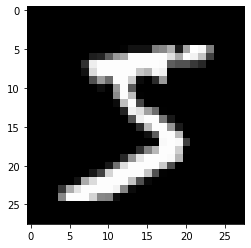

In [21]:
import matplotlib.pyplot as plt
with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print("PRedicted result is: %s, target result is: %s"%(result.numpy(), sample_label))
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

In [34]:
class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super(NestedCell, self).__init__(**kwargs)
    def build(self, input_shapes):
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]
        self.kernel_1 = self.add_weight(shape=(i1, self.unit_1), initializer="uniform", name="kernel_1")
        self.kernel_2_3 = self.add_weight(shape=(i2, i3, self.unit_2, self.unit_3), initializer="uniform",
                                          name="kernel_2_3")
    def call(self, inputs, states):
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states
        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3
        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)
        return output, new_states
    def get_config(self):
        return {"unit_1":self.unit_1, "unit_2":unit_2, "unit_3":self.unit_3}

In [35]:
unit_1 = 10
unit_2 = 20
unit_3 = 30
i1 = 32
i2 = 64
i3 = 32
batch_size = 64
num_batches = 10
timestep = 50
cell = NestedCell(unit_1, unit_2, unit_3)
rnn = keras.layers.RNN(cell)
input_1 = keras.Input((None, i1))
input_2 = keras.Input((None, i2, i3))
outputs = rnn((input_1, input_2))
model = keras.models.Model([input_1, input_2], outputs)
model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [36]:
input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
target_1_data = np.random.random((batch_size * num_batches, unit_1))
target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
input_data = [input_1_data, input_2_data]
target_data = [target_1_data, target_2_data]
model.fit(input_data, target_data, batch_size=batch_size)

10/10 [==============================] - 7s 558ms/step - loss: 0.7910 - rnn_5_loss: 0.3098 - rnn_5_1_loss: 0.4812 - rnn_5_accuracy: 0.1125 - rnn_5_1_accuracy: 0.0316


# Masking and Padding with keras

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
raw_inputs = [
    [711, 632, 71],
    [73, 8, 3215, 927],
    [83, 91, 1, 645, 1253, 927],
]
padded_inputs = tf.keras.preprocessing.sequence.pad_sequences(raw_inputs, padding="post")
print(padded_inputs)

[[ 711  632   71    0    0    0]
 [  73    8 3215  927    0    0]
 [  83   91    1  645 1253  927]]


In [3]:
embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
masked_output = embedding(padded_inputs)
print(masked_output._keras_mask)
masking_layer = layers.Masking()
unmasked_embedding = tf.cast(tf.tile(tf.expand_dims(padded_inputs, axis=-1), [1, 1, 10]), tf.float32)
masked_embedding = masking_layer(unmasked_embedding)
print(masked_embedding._keras_mask)

tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)
tf.Tensor(
[[ True  True  True False False False]
 [ True  True  True  True False False]
 [ True  True  True  True  True  True]], shape=(3, 6), dtype=bool)


In [4]:
class MyLayer(layers.Layer):
    def __init__(self, **kwargs):
        super(MyLayer, self).__init__(**kwargs)
        self.embedding = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)
        self.lstm = layers.LSTM(32)
    def call(self, inputs):
        x = self.embedding(inputs)
        mask = self.embedding.compute_mask(inputs)
        output = self.lstm(x, mask=mask)
        return output
layer = MyLayer()
x = np.random.random((32, 10)) * 100
x = x.astype("int32")
layer(x)

<tf.Tensor: shape=(32, 32), dtype=float32, numpy=
array([[-0.00360916, -0.00803302,  0.00171674, ...,  0.00016223,
         0.00148715, -0.00147442],
       [-0.00170185,  0.00493712, -0.00307632, ..., -0.00229336,
         0.00434857,  0.0086675 ],
       [-0.00043115,  0.00151275,  0.00215201, ...,  0.00168387,
         0.00490442,  0.00368921],
       ...,
       [ 0.01494942,  0.01233144,  0.01274616, ...,  0.00075365,
        -0.00425649,  0.00588885],
       [-0.00026004, -0.00755671,  0.00382418, ...,  0.00867608,
         0.00312251, -0.00772895],
       [-0.00536768, -0.00344387,  0.00647719, ...,  0.00762294,
        -0.01317572, -0.00651452]], dtype=float32)>

In [5]:
class TemporalSplit(keras.layers.Layer):
    def call(self, inputs):
        return tf.split(inputs, 2, axis=1)
    def compute_mask(self, inputs, mask=None):
        if mask is None:
            return None
        return tf.split(mask, 2, axis=1)
first_half, second_half = TemporalSplit()(masked_embedding)
print(first_half._keras_mask)
print(second_half._keras_mask)

tf.Tensor(
[[ True  True  True]
 [ True  True  True]
 [ True  True  True]], shape=(3, 3), dtype=bool)
tf.Tensor(
[[False False False]
 [ True False False]
 [ True  True  True]], shape=(3, 3), dtype=bool)


In [6]:
class CustomEmbedding(keras.layers.Layer):
    def __init__(self, input_dim, output_dim, mask_zero=False, **kwargs):
        super(CustomEmbedding, self).__init__(**kwargs)
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.mask_zero = mask_zero
    def build(self, input_shape):
        self.embedding = self.add_weight(shape=(self.input_dim, self.output_dim), initializer="random_normal", 
                                         dtype="float32")
    def call(self, inputs):
        return tf.nn.embedding_lookup(self.embedding, inputs)
    def compute_mask(self, inputs, mask=None):
        if not self.mask_zero:
            return None
        return tf.not_equal(inputs, 0)
layer = CustomEmbedding(10, 32, mask_zero=True)
x = np.random.random((3, 10)) * 9
x = x.astype("int32")
y = layer(x)
mask = layer.compute_mask(x)
print(mask)

tf.Tensor(
[[ True  True  True  True  True  True  True  True  True  True]
 [False False  True  True  True  True  True  True  True  True]
 [False  True  True  True  True  True False  True  True False]], shape=(3, 10), dtype=bool)


In [7]:
class MyActivation(keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MyActivation, self).__init__(**kwargs)
        self.supports_masking = True
    def call(self, inputs):
        return tf.nn.relu(inputs)

In [9]:
inputs = keras.Input(shape=(None, ), dtype="int32")
x = layers.Embedding(input_dim=5000, output_dim=16, mask_zero=True)(inputs)
x = MyActivation()(x)
print("Mask found:",x._keras_mask)
outputs = layers.LSTM(32)(x)
model = keras.Model(inputs, outputs)

Mask found: KerasTensor(type_spec=TensorSpec(shape=(None, None), dtype=tf.bool, name=None), name='Placeholder_1:0')


In [12]:
class TemporalSoftmax(keras.layers.Layer):
    def call(self, inputs, mask=None):
        broadcast_float_mask = tf.expand_dims(tf.cast(mask, "float32"), -1)
        inputs_exp = tf.exp(inputs) * broadcast_float_mask
        inputs_sum = tf.reduce_sum(inputs_exp * broadcast_float_mask, axis = -1, keepdims=True)
        return inputs_exp / inputs_sum
inputs = keras.Input(shape=(None,), dtype="int32")
x = layers.Embedding(input_dim=10, output_dim=32, mask_zero=True)(inputs)
x = layers.Dense(1)(x)
outputs = TemporalSoftmax()(x)
model = keras.Model(inputs, outputs)
y = model(np.random.randint(0, 10, size=(32, 100)), np.random.random((32, 100, 1)))

# keras.callbacks.Callback

In [17]:
def get_model():
    model = keras.Sequential()
    model.add(keras.layers.Dense(1, input_dim=784))
    model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1), loss="mean_squared_error",
                  metrics=["mean_absolute_error"])
    return model

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32")/255.0
x_test = x_test.reshape(-1, 784).astype("float32")/255.0
x_train = x_train[:1000]
y_train = y_train[:1000]
x_test = x_test[:1000]
y_test = y_test[:1000]

In [21]:
class CustomCallback(keras.callbacks.Callback):
    def on_train_begin(self, logs=None):
        keys = list(logs.keys())
        print("Starting training; got log keys: {}".format(keys))
    def on_train_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop training; got log keys: {}".format(keys))
    def on_epoch_begin(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
    def on_epoch_end(self, epoch, logs=None):
        keys = list(logs.keys())
        print("End epoch {} of training; got log keys: {}".format(epoch, keys))
    def on_test_begin(self, logs=None):
        keys = list(logs.keys())
        print("Start testing; got log keys: {}".format(keys))
    def on_test_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop testing; got log keys: {}".format(keys))
    def on_predict_begin(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))
    def on_predict_end(self, logs=None):
        keys = list(logs.keys())
        print("Stop predicting; got log keys: {}".format(keys))
    def on_train_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Training: start of batch {}; got log keys: {}".format(batch, keys))
    def on_train_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: start of batch {}: got log keys: {}".format(batch, keys))
    def on_test_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))
    def on_test_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Evaluating: end of batch {}; got log keys: {}".format(batch, keys))
    def on_predict_batch_begin(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: start of batch {}; got log keys: {}".format(batch, keys))
    def on_predict_batch_end(self, batch, logs=None):
        keys = list(logs.keys())
        print("...Predicting: end of batch {}; got log keys: {}".format(batch, keys))

In [22]:
model = get_model()
model.fit(x_train, y_train, batch_size=128, epochs=1, verbose=0, validation_split=0.5, callbacks=[CustomCallback()])
res = model.evaluate(x_test, y_test, batch_size=128, verbose=0, callbacks=[CustomCallback()])
res = model.predict(x_test, batch_size=128, callbacks=[CustomCallback()])

Starting training; got log keys: []
End epoch 0 of training; got log keys: []
...Training: start of batch 0; got log keys: []
...Evaluating: start of batch 0: got log keys: ['loss', 'mean_absolute_error']
...Training: start of batch 1; got log keys: []
...Evaluating: start of batch 1: got log keys: ['loss', 'mean_absolute_error']
...Training: start of batch 2; got log keys: []
...Evaluating: start of batch 2: got log keys: ['loss', 'mean_absolute_error']
...Training: start of batch 3; got log keys: []
...Evaluating: start of batch 3: got log keys: ['loss', 'mean_absolute_error']
Start testing; got log keys: []
...Evaluating: end of batch 0; got log keys: []
...Evaluating: end of batch 0; got log keys: ['loss', 'mean_absolute_error']
...Evaluating: end of batch 1; got log keys: []
...Evaluating: end of batch 1; got log keys: ['loss', 'mean_absolute_error']
...Evaluating: end of batch 2; got log keys: []
...Evaluating: end of batch 2; got log keys: ['loss', 'mean_absolute_error']
...Eval

In [27]:
class LossAndErrorPrintingCallback(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs=None):
        print("Up to batch {}, the average loss is {:7.2f}".format(batch, logs["loss"]))
    def on_test_batch_end(self, batch, logs=None):
        print("Up to batch {}, the average loss is {:7.2f}".format(batch, logs["loss"]))
#     def on_epoch_end(self, epoch, logs=None):
#         print("The average loss for epoch {} is {:.7.2f} and mean absolute error is {:7.2f}".format(epoch, logs["loss"], 
#                                                                                                      logs["mean_absolute_error"]))
model = get_model()
model.fit(x_train, y_train, batch_size=128, epochs=2, verbose=0, callbacks=[LossAndErrorPrintingCallback()])
res = model.evaluate(x_test, y_test, batch_size=128, verbose=0, callbacks=[LossAndErrorPrintingCallback()])

Up to batch 0, the average loss is   26.85
Up to batch 1, the average loss is  462.78
Up to batch 2, the average loss is  316.08
Up to batch 3, the average loss is  239.36
Up to batch 4, the average loss is  192.76
Up to batch 5, the average loss is  161.97
Up to batch 6, the average loss is  139.64
Up to batch 7, the average loss is  125.62
Up to batch 0, the average loss is    5.21
Up to batch 1, the average loss is    4.92
Up to batch 2, the average loss is    4.46
Up to batch 3, the average loss is    4.56
Up to batch 4, the average loss is    4.57
Up to batch 5, the average loss is    4.61
Up to batch 6, the average loss is    4.64
Up to batch 7, the average loss is    4.50
Up to batch 0, the average loss is    4.98
Up to batch 1, the average loss is    4.42
Up to batch 2, the average loss is    4.39
Up to batch 3, the average loss is    4.38
Up to batch 4, the average loss is    4.54
Up to batch 5, the average loss is    4.53
Up to batch 6, the average loss is    4.49
Up to batch

In [31]:
import numpy as np
class EarlyStoppingAtMinLoss(keras.callbacks.Callback):
    def __init__(self, patience=0):
        super(EarlyStoppingAtMinLoss, self).__init__()
        self.patience = patience
        self.best_weights = None
    def on_train_begin(self, logs=None):
        self.wait = 0
        self.stopped_epoch = 0
        self.best = np.Inf
    def on_epoch_end(self, epoch, logs=None):
        current = logs.get("loss")
        if np.less(current, self.best):
            self.best = current
            self.wait = 0
            self.best_weights = self.model.get_weights()
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Restoring model weights from the end of the best epoch.")
                self.model.set_weights(self.best_weights)
    def on_train_end(self, logs=None):
        if self.stopped_epoch > 0:
            print("Epoch %05d: early stopping" %(self.stopped_epoch + 1))

model = get_model()
model.fit(x_train, y_train, batch_size=64, steps_per_epoch=5, epochs=30, verbose=0, 
          callbacks=[LossAndErrorPrintingCallback(), EarlyStoppingAtMinLoss()])

Up to batch 0, the average loss is   30.36
Up to batch 1, the average loss is  467.80
Up to batch 2, the average loss is  321.18
Up to batch 3, the average loss is  243.67
Up to batch 4, the average loss is  196.77
Up to batch 0, the average loss is    5.15
Up to batch 1, the average loss is    5.84
Up to batch 2, the average loss is    5.47
Up to batch 3, the average loss is    5.56
Up to batch 4, the average loss is    5.49
Up to batch 0, the average loss is    5.16
Up to batch 1, the average loss is    6.28
Up to batch 2, the average loss is    7.54
Up to batch 3, the average loss is    8.65
Up to batch 4, the average loss is    9.46
Restoring model weights from the end of the best epoch.
Epoch 00003: early stopping


In [38]:
class CustomLeariningRateScheduler(keras.callbacks.Callback):
    def __init__(self, schedule):
        super(CustomLeariningRateScheduler, self).__init__()
        self.schedule = schedule
    def on_epoch_begin(self, epoch, logs=None):
        if not hasattr(self.model.optimizer, "lr"):
            raise ValueError("Optimizer must have a \"lr\" attribute")
        lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        schedule_lr = self.schedule(epoch, lr)
        tf.keras.backend.set_value(self.model.optimizer.lr, schedule_lr)
        print("\nEpoch %05d: Learning rate is %6.4f."%(epoch, schedule_lr))
LR_SCHEDULE = [
    (3, 0.05),
    (6, 0.01),
    (9, 0.005),
    (12, 0.001)
]
def lr_schedule(epoch, lr):
    if epoch < LR_SCHEDULE[0][0] or epoch > LR_SCHEDULE[-1][0]:
        return lr
    for i in range(len(LR_SCHEDULE)):
        if epoch == LR_SCHEDULE[i][0]:
            return LR_SCHEDULE[i][1]
    return lr

model = get_model()
model.fit(x_train, y_train, batch_size=64, steps_per_epoch=5, epochs=15, verbose=0, 
          callbacks=[LossAndErrorPrintingCallback(), CustomLeariningRateScheduler(lr_schedule)])


Epoch 00000: Learning rate is 0.1000.
Up to batch 0, the average loss is   25.44
Up to batch 1, the average loss is  478.64
Up to batch 2, the average loss is  327.19
Up to batch 3, the average loss is  247.47
Up to batch 4, the average loss is  199.96

Epoch 00001: Learning rate is 0.1000.
Up to batch 0, the average loss is    7.63
Up to batch 1, the average loss is    6.32
Up to batch 2, the average loss is    6.74
Up to batch 3, the average loss is    6.43
Up to batch 4, the average loss is    6.00

Epoch 00002: Learning rate is 0.1000.
Up to batch 0, the average loss is    4.83
Up to batch 1, the average loss is    4.54
Up to batch 2, the average loss is    4.40
Up to batch 3, the average loss is    4.70
Up to batch 4, the average loss is    4.70

Epoch 00003: Learning rate is 0.0500.
Up to batch 0, the average loss is    7.00
Up to batch 1, the average loss is    5.94
Up to batch 2, the average loss is    5.34
Up to batch 3, the average loss is    4.86
Up to batch 4, the average 

# Transfer leaning and fine-tunning

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow  import keras

In [2]:
layer = keras.layers.Dense(3)
layer.build((None, 4))
print("weights:", len(layer.weights))
print("trainable_weights:", len(layer.trainable_weights))
print("non_trainable_weights", len(layer.non_trainable_weights))

weights: 2
trainable_weights: 2
non_trainable_weights 0


In [3]:
layer = keras.layers.BatchNormalization()
layer.build((None, 4))
print("weights", len(layer.weights))
print("trainable weights", len(layer.trainable_weights))
print("non_trainable_weights", len(layer.non_trainable_weights))

weights 4
trainable weights 2
non_trainable_weights 2


In [4]:
layer = keras.layers.Dense(3)
layer.build((None, 4))
layer.trainable = False
print("weights", len(layer.weights))
print("trainable_weights", len(layer.trainable_weights))
print("non_trainable_weights", len(layer.non_trainable_weights))

weights 2
trainable_weights 0
non_trainable_weights 2


In [5]:
layer1 = keras.layers.Dense(3, activation="relu")
layer2 = keras.layers.Dense(3, activation="sigmoid")
model = keras.Sequential([keras.Input(shape=(3,)), layer1, layer2])
layer1.trainable = False
initial_layer1_weights_values = layer1.get_weights()
model.compile(optimizer="adam", loss="mse")
model.fit(np.random.random((2, 3)), np.random.random((2, 3)))
final_layer1_weights_values = layer1.get_weights()
np.testing.assert_allclose(initial_layer1_weights_values[0], final_layer1_weights_values[0])
np.testing.assert_allclose(initial_layer1_weights_values[1], final_layer1_weights_values[1])

1/1 [==============================] - 0s 328ms/step - loss: 0.0495


In [6]:
inner_model = keras.Sequential([
    keras.Input(shape=(3,)),
    keras.layers.Dense(3, activation="relu"),
    keras.layers.Dense(3, activation="relu")
])
model = keras.Sequential([keras.Input(shape=(3, )), inner_model, keras.layers.Dense(3, activation="sigmoid")])
model.trainable = False
assert inner_model.trainable == False
assert inner_model.layers[0].trainable == False

In [7]:
base_model = keras.applications.Xception(weights="imagenet", input_shape=(150, 150, 3), include_top=False)

In [8]:
base_model.trainable = False

In [10]:
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.BinaryCrossentropy(from_logits=True), 
              metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=20, callbacks=..., validation_data=...)

In [ ]:
base_model.trainable = True
model.compile(optimizer=keras.optimizers.Adam(1e-5), loss=keras.losses.BinaryCrossentropy(from_logits=True), 
             metrics=[keras.metrics.BinaryAccuracy()])
model.fit(new_dataset, epochs=10, callbacks=..., validation_data=...)

In [11]:
base_model = keras.applications.Xception(weights="imagenet", input_shape=(150, 150, 3), include_top=False)
base_model.trainable=False
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)
loss_fn = keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam()
for inputs, targets in new_dataset:
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss_value = loss_fn(targets, predictions)
    gradients = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))

NameError: name 'new_dataset' is not defined

# Training Keras models with Tensorflow Cloud

In [13]:
import tensorflow as tf
import tensorflow_cloud as tfc
from tensorflow import keras
from tensorflow.keras import layers

In [17]:

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
model = keras.Sequential([
    keras.Input(shape=(28, 28)),
    layers.experimental.preprocessing.Rescaling(1.0/255),
    layers.Reshape(target_shape=(28, 28, 1)),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation="relu"),
    layers.MaxPooling2D(2),
    layers.Conv2D(32, 3, activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10)
])
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=keras.metrics.SparseCategoricalAccuracy())
model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 33s 76ms/step - loss: 0.2988 - sparse_categorical_accuracy: 0.9124 - val_loss: 0.0894 - val_sparse_categorical_accuracy: 0.9745
Epoch 2/20
422/422 [==============================] - 32s 77ms/step - loss: 0.0793 - sparse_categorical_accuracy: 0.9752 - val_loss: 0.0769 - val_sparse_categorical_accuracy: 0.9787
Epoch 3/20
422/422 [==============================] - 32s 76ms/step - loss: 0.0554 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.0505 - val_sparse_categorical_accuracy: 0.9863
Epoch 4/20
422/422 [==============================] - 33s 77ms/step - loss: 0.0429 - sparse_categorical_accuracy: 0.9868 - val_loss: 0.0425 - val_sparse_categorical_accuracy: 0.9882
Epoch 5/20
422/422 [==============================] - 32s 76ms/step - loss: 0.0338 - sparse_categorical_accuracy: 0.9894 - val_loss: 0.0439 - val_sparse_categorical_accuracy: 0.9868
Epoch 6/20
422/422 [==============================] - 32s 77ms/step - loss: 0.0298 - spars

In [25]:
def create_model():
    model = keras.Sequential([
        keras.Input(shape=(28, 28)),
        layers.experimental.preprocessing.Rescaling(1.0/255),
        layers.Reshape(target_shape=(28, 28, 1)),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation="relu"),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation="relu"),
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10),
    ])
    model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics=keras.metrics.SparseCategoricalAccuracy())
    return model

In [26]:
import datetime
import os
gcp_bucket = "keras-examples"
checkpoint_path = os.path.join("gs://", gcp_bucket, "mnist_example", "save_at_{epoch}")
tensorflow_path = os.path.join("gs://", gcp_bucket, "logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
callbacks = [keras.callbacks.TensorBoard(log_dir=tensorflow_path, histogram_freq=1), 
            keras.callbacks.ModelCheckpoint(checkpoint_path), 
            keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)]
model = create_model()

In [27]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [29]:
if tfc.remote():
    epochs = 100
    callbacks = callbacks
    batch_size = 128
else:
    epochs = 5
    batch_size = 64
    callbacks = None
model.fit(x_train, y_train, epochs=epochs, callbacks=callbacks, batch_size=batch_size)

Epoch 1/5
938/938 [==============================] - 39s 41ms/step - loss: 0.2173 - sparse_categorical_accuracy: 0.9333
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0617 - sparse_categorical_accuracy: 0.9812
Epoch 3/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0438 - sparse_categorical_accuracy: 0.9862
Epoch 4/5
938/938 [==============================] - 38s 41ms/step - loss: 0.0351 - sparse_categorical_accuracy: 0.9888 3s - loss: 0.0346 - sparse_categ - ETA: 1s - loss: 0.0352 - sparse_ca
Epoch 5/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0280 - sparse_categorical_accuracy: 0.9907


In [31]:
save_path = os.path.join("gs://", gcp_bucket, "mnist_example")
if tfc.remote():
    model.save(save_path)

TypeError: Unknown keyword arguments: dict_keys(['docker_image_name'])